#  **FINAL PROJECT**
## DỰ ĐOÁN GIÁ ICO SỬ DỤNG MACHINE LEARNING
![alt text](https://i.imgur.com/mFQhIcT.jpg)


### **Thành Viên**
Đào Minh Thuấn - 15119138

Sinh viên ngành công nghệ Kỹ Thuật Máy Tính
![alt text](https://i.imgur.com/vthCImG.jpg)

Thông tin liên hệ: 
Facebook: https://www.facebook.com/profile.php?id=100012617204951

Gmail: daominhthuan091296@gmail.com

********************************************************************************

Lê Thanh Tuấn - 15119142

Sinh viên ngành công nghệ Kỹ Thuật Máy Tính

![alt text](https://i.imgur.com/lyC00ox.png)

Thông tin liên hệ:

Facebook: https://www.facebook.com/tuan.lt259

### **GIỚI THIỆU**
Trong đề tài này,chúng em sẽ lập trình dự đoán giá giá của Token sau 6 tháng. Điều này có được là sử dụng dữ liệu lịch sử đã được tổng hợp từ các trang web và API công khai, cũng như là dữ liệu đã được thu thập và tính toán thủ công.



### **CÁC PHẦN** 
- Import các tư viện cần thiết và viết các hàm cần thiết.
- Loading dataset vào trong biến.
- In ra biểu đồ phân tán thể hiện mối tương quan giữa các input với output.
- Mã hóa và phân chia dữ liệu.
- Sử dụng hồi quy đa biến thông thường để tính toán dự đoán kết quả => chứng sự ảnh hưởng của overfitting.
- Ridge Regression
  - Tìm ra model hồi quy có giá trị rMSE tốt nhất.
  - Tìm model hồi quy có giá trị R2 tốt nhất.
  - Load 2 model trên và tính toán hiệu năng.
  - Dự đoán giá ICO.
- Neural Network
  - Tìm ra model NN có giá trị rMSE tốt nhất.
  - Tìm model NN có giá trị R2 tốt nhất.
  - Load 2 model trên và tính toán hiệu năng.
  - Dự đoán giá ICO.

### **CÁC THƯ VIỆN VÀ FUNCTION CẦN THIẾT.**

### **CÁC THƯ VIỆN**

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)
from matplotlib.animation import FuncAnimation
#plt.style.use('ggplot')
import pandas as pd
from math import sqrt

In [0]:
from enum import Enum
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import os
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import OneHotEncoder
from sklearn.externals import joblib
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### **FUNCTION**

In [0]:
class LineaReggressionMetrics(Enum):
    R_SQUARED = 1
    ROOT_MEAN_SQUARED_ERROR = 2
    MEAN_ABSOLUTE_ERROR = 3

In [0]:
class Solvers(Enum):
    lbfgs = 1
    sgd = 2
    adam = 3

In [0]:
def load_Dataset1(dataset = './DATASET/ico_data_final.csv'):
    all_data = np.genfromtxt(fname=dataset, names=True, delimiter=',')
    #Lấy hết toàn bộ header trong dataset trả về kiểu chuỗi    
    featureNames = all_data.dtype.names[1:-1] 
    #Lấy hết toàn bộ tên của ico.
    ico_names = np.genfromtxt(fname=dataset, delimiter=',',skip_header=1, usecols=0, dtype=str)
    #Lấy hết toàn bộ giá trị trong dataset trừ header và tên ico
    all_data = np.genfromtxt(fname=dataset, delimiter=',',skip_header=1)[:,1:]
    #Lấy hết giá trị thuộc các thành phần output
    x = np.genfromtxt(fname=dataset, delimiter=',',skip_header=1)[:,1:-1]
    #Lấy hết giá trị output
    y = np.genfromtxt(fname=dataset, delimiter=',',skip_header=1)[:,-1]
    return (featureNames,x,y,ico_names)


In [0]:
def load_Dataset2(path = './DATASET/ico_data_final.csv'):    
    dataset = pd.read_csv(path)
    x= dataset.iloc[:, 1:-1].values 
    data_com = dataset.iloc[:,1:14].values
    print(data_com)
    #Lấy giá trị cột cuối
    y= dataset.iloc[:,13].values
    icoNames = dataset.iloc[:,0]
    featureNames = list(dataset.columns[1:-1])
    return (featureNames, x, y, icoNames, data_com)

In [0]:
def createFolderIfDoesntExist(folderName):
    exists = os.path.isdir(folderName)
    if not exists:
        os.makedirs(folderName)
        
    return exists

In [0]:
# Tải dataset từ Github
def loadDataFromGithub(fileName='./DATASET/ico_data_final.csv'):
    exists = os.path.isfile(fileName)
    if not exists:
      !wget https://raw.githubusercontent.com/daominhthuan42/FINAL-PROJECT/master/FINAL_PROJECT/FINAL_PROJECT/ico_data_final.csv -P "./DATASET/"

In [0]:
def loadModel(fileName):
    exists = os.path.isfile(fileName)
    if exists:    
        # Tải model nếu nó tồn tại
        return joblib.load(fileName)
    else:
        return None

In [0]:
def createResultsFolderIfDoesntExist(folder):
    folderExists = createFolderIfDoesntExist(folder)
    #if not folderExists:
      #download best models from github - mainly for google colab
     # !wget https://github.com/daominhthuan42/FINAL-PROJECT/blob/master/FINAL_PROJECT/BEST_MODEL/bestRegressionModel_Ridge_MEAN_ABSOLUTE_ERROR.sav?raw=true -P "./RESULT/"
     # !wget https://github.com/daominhthuan42/FINAL-PROJECT/blob/master/FINAL_PROJECT/BEST_MODEL/bestRegressionModel_Ridge_ROOT_MEAN_SQUARED_ERROR.sav?raw=true -P "./RESULT/" 
     # !wget https://github.com/daominhthuan42/FINAL-PROJECT/blob/master/FINAL_PROJECT/BEST_MODEL/bestRegressionModel_Ridge_R_SQUARED.sav?raw=true -P "./RESULT/"       

In [0]:
"""
HÀM NÀY LÀ SẼ IN RA PLOT MONG MUỐN VÀ PLOT DỰ ĐOÁN
"""
def plotExpectedVsPredictedOutput(y_test, y_pred, fileName='', saveToFile=False):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(y_test, y_pred, c = "blue", label = "y_pred")
    ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.legend(loc="upper left")
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.title(fileName)
    if(saveToFile == True):
        createFolderIfDoesntExist("IMAGE_RESULT/")
        plt.savefig('IMAGE_RESULT/'+fileName+".png", dpi = 300)
    else: 
        plt.show()

In [0]:
"""
HÀM NÀY LÀ SẼ IN RA PLOT MONG MUỐN VÀ PLOT DỰ ĐOÁN
"""
def plotExpectedVsPredictedOutput2(y_test, y_pred, fileName='', saveToFile = True):
    plt.subplots(figsize=(6,6))    
    plt.xlabel('y_pred')
    plt.ylabel('y_test_holdout')   
    sns.regplot(y_pred, y_test, ci = None)    
    plt.title(fileName)
    if(saveToFile == True):
        createFolderIfDoesntExist("IMAGE_RESULT/")
        plt.savefig('IMAGE_RESULT/'+fileName+".png", dpi = 300)    
    plt.show()

In [0]:
def line_plot(line1, line2, label1= 'actual', label2= 'prediction', title='', lw=2, saveToFile = True):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1,'-o',  color='darkorange', label=label1, linewidth=lw)
    ax.plot(line2, '-s', color='navy', label=label2, linewidth=lw)   
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if(saveToFile == True):
        createFolderIfDoesntExist("IMAGE_LINE_PLOT/")
        plt.savefig('IMAGE_LINE_PLOT/'+title+".png", dpi = 500)
    plt.show()

In [0]:
def line_plot2(line, lw = 2, saveToFile= True, title='', label1=''):
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.plot(line,  color='darkorange', label=label1, linewidth=lw)    
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if(saveToFile == True):
        createFolderIfDoesntExist("OPTIMIZE/")
        plt.savefig('OPTIMIZE/'+title+".png", dpi = 300)
    plt.show()

In [0]:
def plotResult(y_test_hodlout, y_pred_rMSE, y_pred_R2, y_pred_MAE, saveToFile = True, rMSE = '', R2= '', MAE = ''):
  f, ax = plt.subplots(figsize=(10, 7), nrows=3)  
  f.tight_layout()
  ax[0].plot(range(len(y_pred_rMSE)), y_pred_rMSE, '-s', color='navy', label='Predicted Values', linewidth = 1);
  ax[0].plot(range(len(y_pred_rMSE)), y_test_hodlout, '-o', color='darkorange', label='Actual Values', linewidth = 1);
  ax[0].set_title("Predicted vs Actuals Using Best model rMSE: " + rMSE)
  ax[0].legend(loc='best')

  ax[1].plot(range(len(y_pred_R2)), y_pred_R2, '-s', color='navy', label='Predicted Values', linewidth = 1);
  ax[1].plot(range(len(y_pred_R2)), y_test_hodlout, '-o', color='darkorange', label='Actual Values', linewidth = 1);
  ax[1].set_title("Predicted vs Actuals Using Best model R2: "+R2)
  ax[1].legend(loc='best')

  ax[2].plot(range(len(y_pred_MAE)), y_pred_MAE, '-s', color='navy', label='Predicted Values', linewidth = 1);
  ax[2].plot(range(len(y_pred_MAE)), y_test_hodlout, '-o', color='darkorange', label='Actual Values', linewidth = 1);
  ax[2].set_title("Predicted vs Actuals Using Best model MAE: "+ MAE)
  ax[2].legend(loc='best')
  if(saveToFile == True):
      createFolderIfDoesntExist("LINE_PLOT_3/")
      plt.savefig('LINE_PLOT_3/'+"PLOT_RESULT"+".png", dpi = 300)

In [0]:
def plotResult2(y_test_hodlout, y_pred_Ridge_rMSE, y_pred_Ridge_R2, y_pred_Ridge_MAE, y_pred_NN_rMSE, 
                y_pred_NN_R2, y_pred_NN_MAE, saveToFile = True, solver = Solvers.lbfgs):
  #f, ax = plt.subplots(figsize=(5.1866666666666665, 6.333333333333333), nrows=6)
  f, ax = plt.subplots(figsize=(15, 10), nrows=6)   
  f.tight_layout()
  ax[0].plot(range(len(y_pred_Ridge_rMSE)), y_pred_Ridge_rMSE, '-s', color='navy', label='Predicted Values', linewidth = 1);
  ax[0].plot(range(len(y_pred_Ridge_rMSE)), y_test_hodlout, '-o', color='darkorange', label='Actual Values', linewidth = 1);
  ax[0].set_title("Predicted vs Actuals Using Best model rMSE Ridge")
  ax[0].legend(loc='best')

  ax[1].plot(range(len(y_pred_Ridge_R2)), y_pred_Ridge_R2, '-s', color='navy', label='Predicted Values', linewidth = 1);
  ax[1].plot(range(len(y_pred_Ridge_R2)), y_test_hodlout, '-o', color='darkorange', label='Actual Values', linewidth = 1);
  ax[1].set_title("Predicted vs Actuals Using Best model R2 Ridge")
  ax[1].legend(loc='best')

  ax[2].plot(range(len(y_pred_Ridge_MAE)), y_pred_Ridge_MAE, '-s', color='navy', label='Predicted Values', linewidth = 1);
  ax[2].plot(range(len(y_pred_Ridge_MAE)), y_test_hodlout, '-o', color='darkorange', label='Actual Values', linewidth = 1);
  ax[2].set_title("Predicted vs Actuals Using Best model MAE Ridge")
  ax[2].legend(loc='best')

  ax[3].plot(range(len(y_pred_NN_rMSE)), y_pred_NN_rMSE, '-s', color='navy', label='Predicted Values', linewidth = 1);
  ax[3].plot(range(len(y_pred_NN_rMSE)), y_test_hodlout, '-o', color='darkorange', label='Actual Values', linewidth = 1);
  ax[3].set_title("Predicted vs Actuals Using Best model rMSE NN " + str(solver.name))
  ax[3].legend(loc='best')

  ax[4].plot(range(len(y_pred_NN_R2)), y_pred_NN_R2, '-s', color='navy', label='Predicted Values', linewidth = 1);
  ax[4].plot(range(len(y_pred_NN_R2)), y_test_hodlout, '-o', color='darkorange', label='Actual Values', linewidth = 1);
  ax[4].set_title("Predicted vs Actuals Using Best model R2 NN " + str(solver.name))
  ax[4].legend(loc='best')

  ax[5].plot(range(len(y_pred_NN_MAE)), y_pred_NN_MAE, '-s', color='navy', label='Predicted Values', linewidth = 1);
  ax[5].plot(range(len(y_pred_NN_MAE)), y_test_hodlout, '-o', color='darkorange', label='Actual Values', linewidth = 1);
  ax[5].set_title("Predicted vs Actuals Using Best model MAE NN " + str(solver.name))
  ax[5].legend(loc='best')  
  if(saveToFile == True):
      createFolderIfDoesntExist("LINE_PLOT_6/")
      plt.savefig('LINE_PLOT_6/'+"PLOT_RESULT"+".png", dpi = 300)

In [0]:
def plotPredicted(rMSE, R2, MAE):
  plt.figure(figsize=(10, 5))
  ax1 = plt.subplot(311, title ='Price ICO 0x, modum and crypto20 using best model rMSE')
  ax1.hist(rMSE)
  ax2 = plt.subplot(312,sharex=ax1, title ='Price ICO 0x, modum and crypto20 using best model R2')
  ax2.hist(R2)
  ax3 = plt.subplot(313,sharex=ax1, title ='Price ICO 0x, modum and crypto20 using best model MAE')
  ax3.hist(MAE)
  plt.tight_layout()

In [0]:
def printPlotCoef(feauteNames, model):
    d = model.coef_[0:12]
    print("Hệ số: ", d)
    print("Input: ", feauteNames) 
    data = { feauteNames[0]: d[0], feauteNames[1]: d[1], feauteNames[2]: d[2], feauteNames[3]: d[3], feauteNames[4]: d[4], feauteNames[5]: d[5], feauteNames[6]: d[6],
            feauteNames[7]: d[7], feauteNames[8]: d[8], feauteNames[9]: d[9], feauteNames[10]: d[10], feauteNames[11]: d[11]}  
    coef = pd.Series(data)
    plt.figure(figsize=(10, 5))
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    coef.head(12).plot(kind='bar')
    plt.title('Feature Significance')
    plt.tight_layout()    

In [0]:
"""
HÀM TÍNH TOÁN DỰ ĐOÁN KẾT QUẢ
"""        
def makePrediction(model,example_to_predict):
    encoded_x, encodedCategoryArray = encodeSingleElement(x,example_to_predict)
    y_pred = model.predict(encoded_x.reshape(1, -1))
    
    return y_pred

In [0]:
"""
HÀM TÍNH TOÁN RA HỆ SỐ TƯƠNG QUAN GIỮA CÁC BIẾN VÀ SỬ DỤNG BIỂU ĐỒ
PHÂN TÁN ĐỂ THỂ HIỆN SỰ TUYẾN TÍNH GIỮA 2 BIẾN.
"""
def getCovarianceMatrixAndPrintScatterPlot(x, y, saveToFile=True):
    nrows = x.shape[0] #trả về sô hàng
    ncols = x.shape[1] # trả về số vột 

    for i in np.arange(ncols):
        corCoef = np.corrcoef(x[:,i], y) 
        plt.xlabel(featureNames[i])
        plt.ylabel("Price after 6 months ($) ")
        plt.suptitle('Scatter Plot of feature {:s} vs Price after 6 months'.format(featureNames[i]))
        corr = "Correlation Coefficient: "+str(corCoef[0,1])
        plt.title(corr)
        plt.scatter(x[:,i], y)
        if(saveToFile == True):
            exist= createFolderIfDoesntExist("IMAGE_SCATTER/")
            plt.savefig('IMAGE_SCATTER/{:s}_vs_Price_scatter_plot.png'.format(featureNames[i]), dpi = 300)                    
            plt.show()
        
        plt.clf() 

### **TẠO CÁC FOLDER CẦN THIẾT**

In [0]:
createResultsFolderIfDoesntExist("BEST_MODEL/")

In [0]:
loadDataFromGithub()

### **LOADING ICO DATASET VÀO TRONG BIẾN**

In [0]:
(featureNames, x, y, icoNames, data_com) = load_Dataset2()

[[1.2293200e+00 1.4290000e-04 2.0000000e+07 ... 1.0000000e+00
  2.8000000e+01 2.1900000e+00]
 [4.7956900e-01 5.5750000e-05 1.0000000e+09 ... 1.9000000e+01
  1.8200000e+02 3.7110200e-01]
 [2.3553500e-01 2.7380000e-05 1.3027102e+08 ... 1.6000000e+01
  5.1000000e+01 9.0026900e-01]
 ...
 [1.6330600e-01 1.8980000e-05 2.0000000e+08 ... 5.0000000e+00
  1.5600000e+02 2.6197800e-01]
 [1.0328300e+00 1.2006000e-04 9.9218023e+07 ... 2.8000000e+01
  1.5500000e+02 2.8900000e+00]
 [2.5667400e-01 2.9840000e-05 1.8500000e+09 ... 1.5000000e+01
  2.9000000e+01 2.7435000e-01]]


### **HỆ SỐ TƯƠNG QUAN GIỮA CÁC INPUT VỚI OUTPUT**
Hệ số tương quan thê hiển độ quan hệ tuyến tính giữa 2 biến không phân biệt biến này phụ thuộc biến kia.

**Đặc tính:**
 - Hệ số tương quan không có đơn vị.
 - Nằm trong khoàng [-1,1].

  ![alt text](https://i.imgur.com/72RWtXW.png)
 - r > 0: Tương quan dương.
 - r < 0: Tương quan âm.
 - r = 0: Không tương quan.
 Đánh giá tương quan giữa 2 biến định lượng.

 ![alt text](https://i.imgur.com/JpGBUGC.png)

 

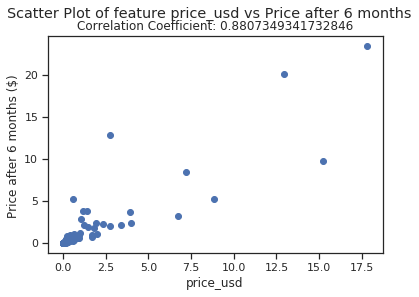

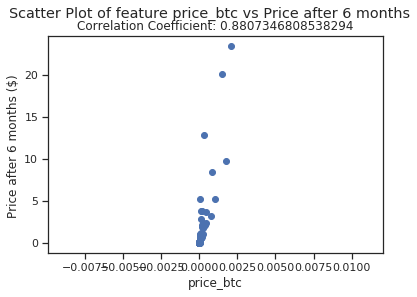

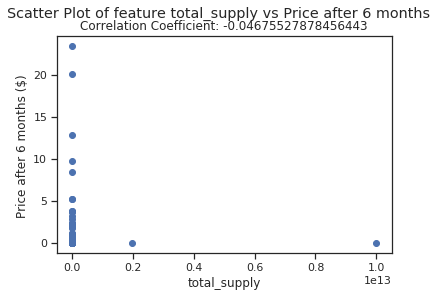

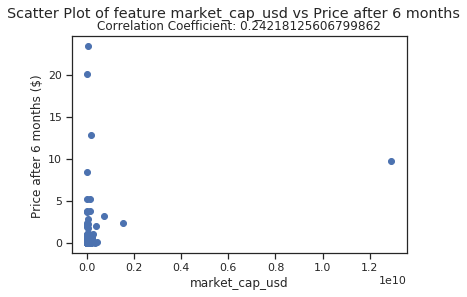

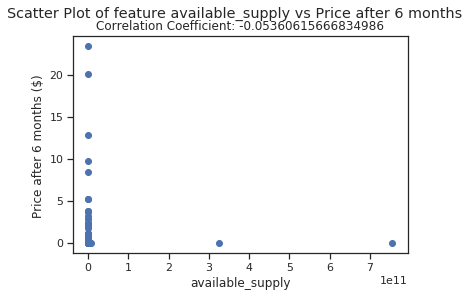

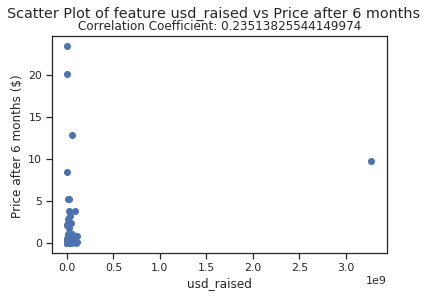

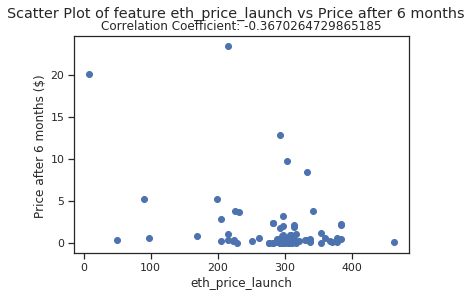

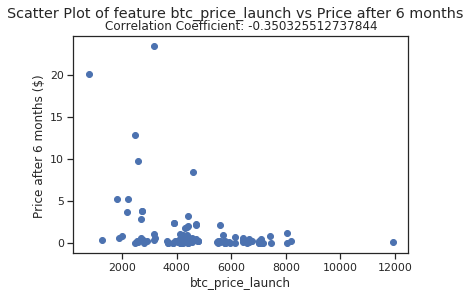

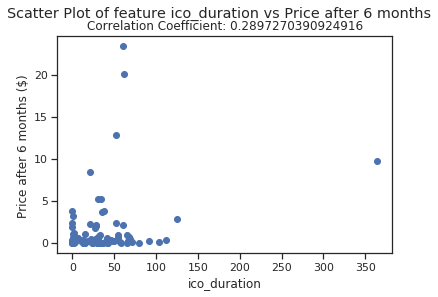

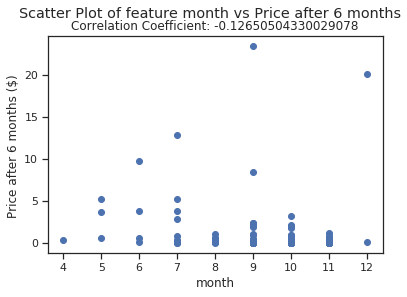

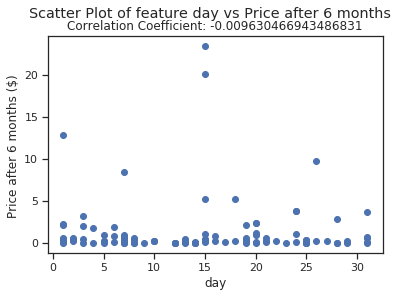

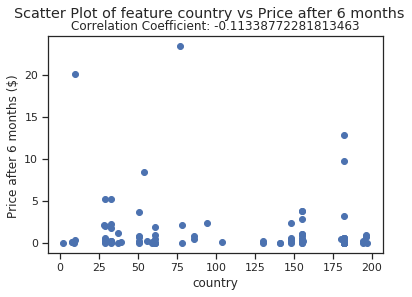

<Figure size 432x288 with 0 Axes>

In [0]:
getCovarianceMatrixAndPrintScatterPlot(x, y)

Biểu đồ thể hiện đẩy đủ mối liên hệ giữa các biến sử dụng code R.
![alt text](https://i.imgur.com/ULiljOG.png)


Biểu đồ thể hiện sự tương quan giữa các biến sử dụng python

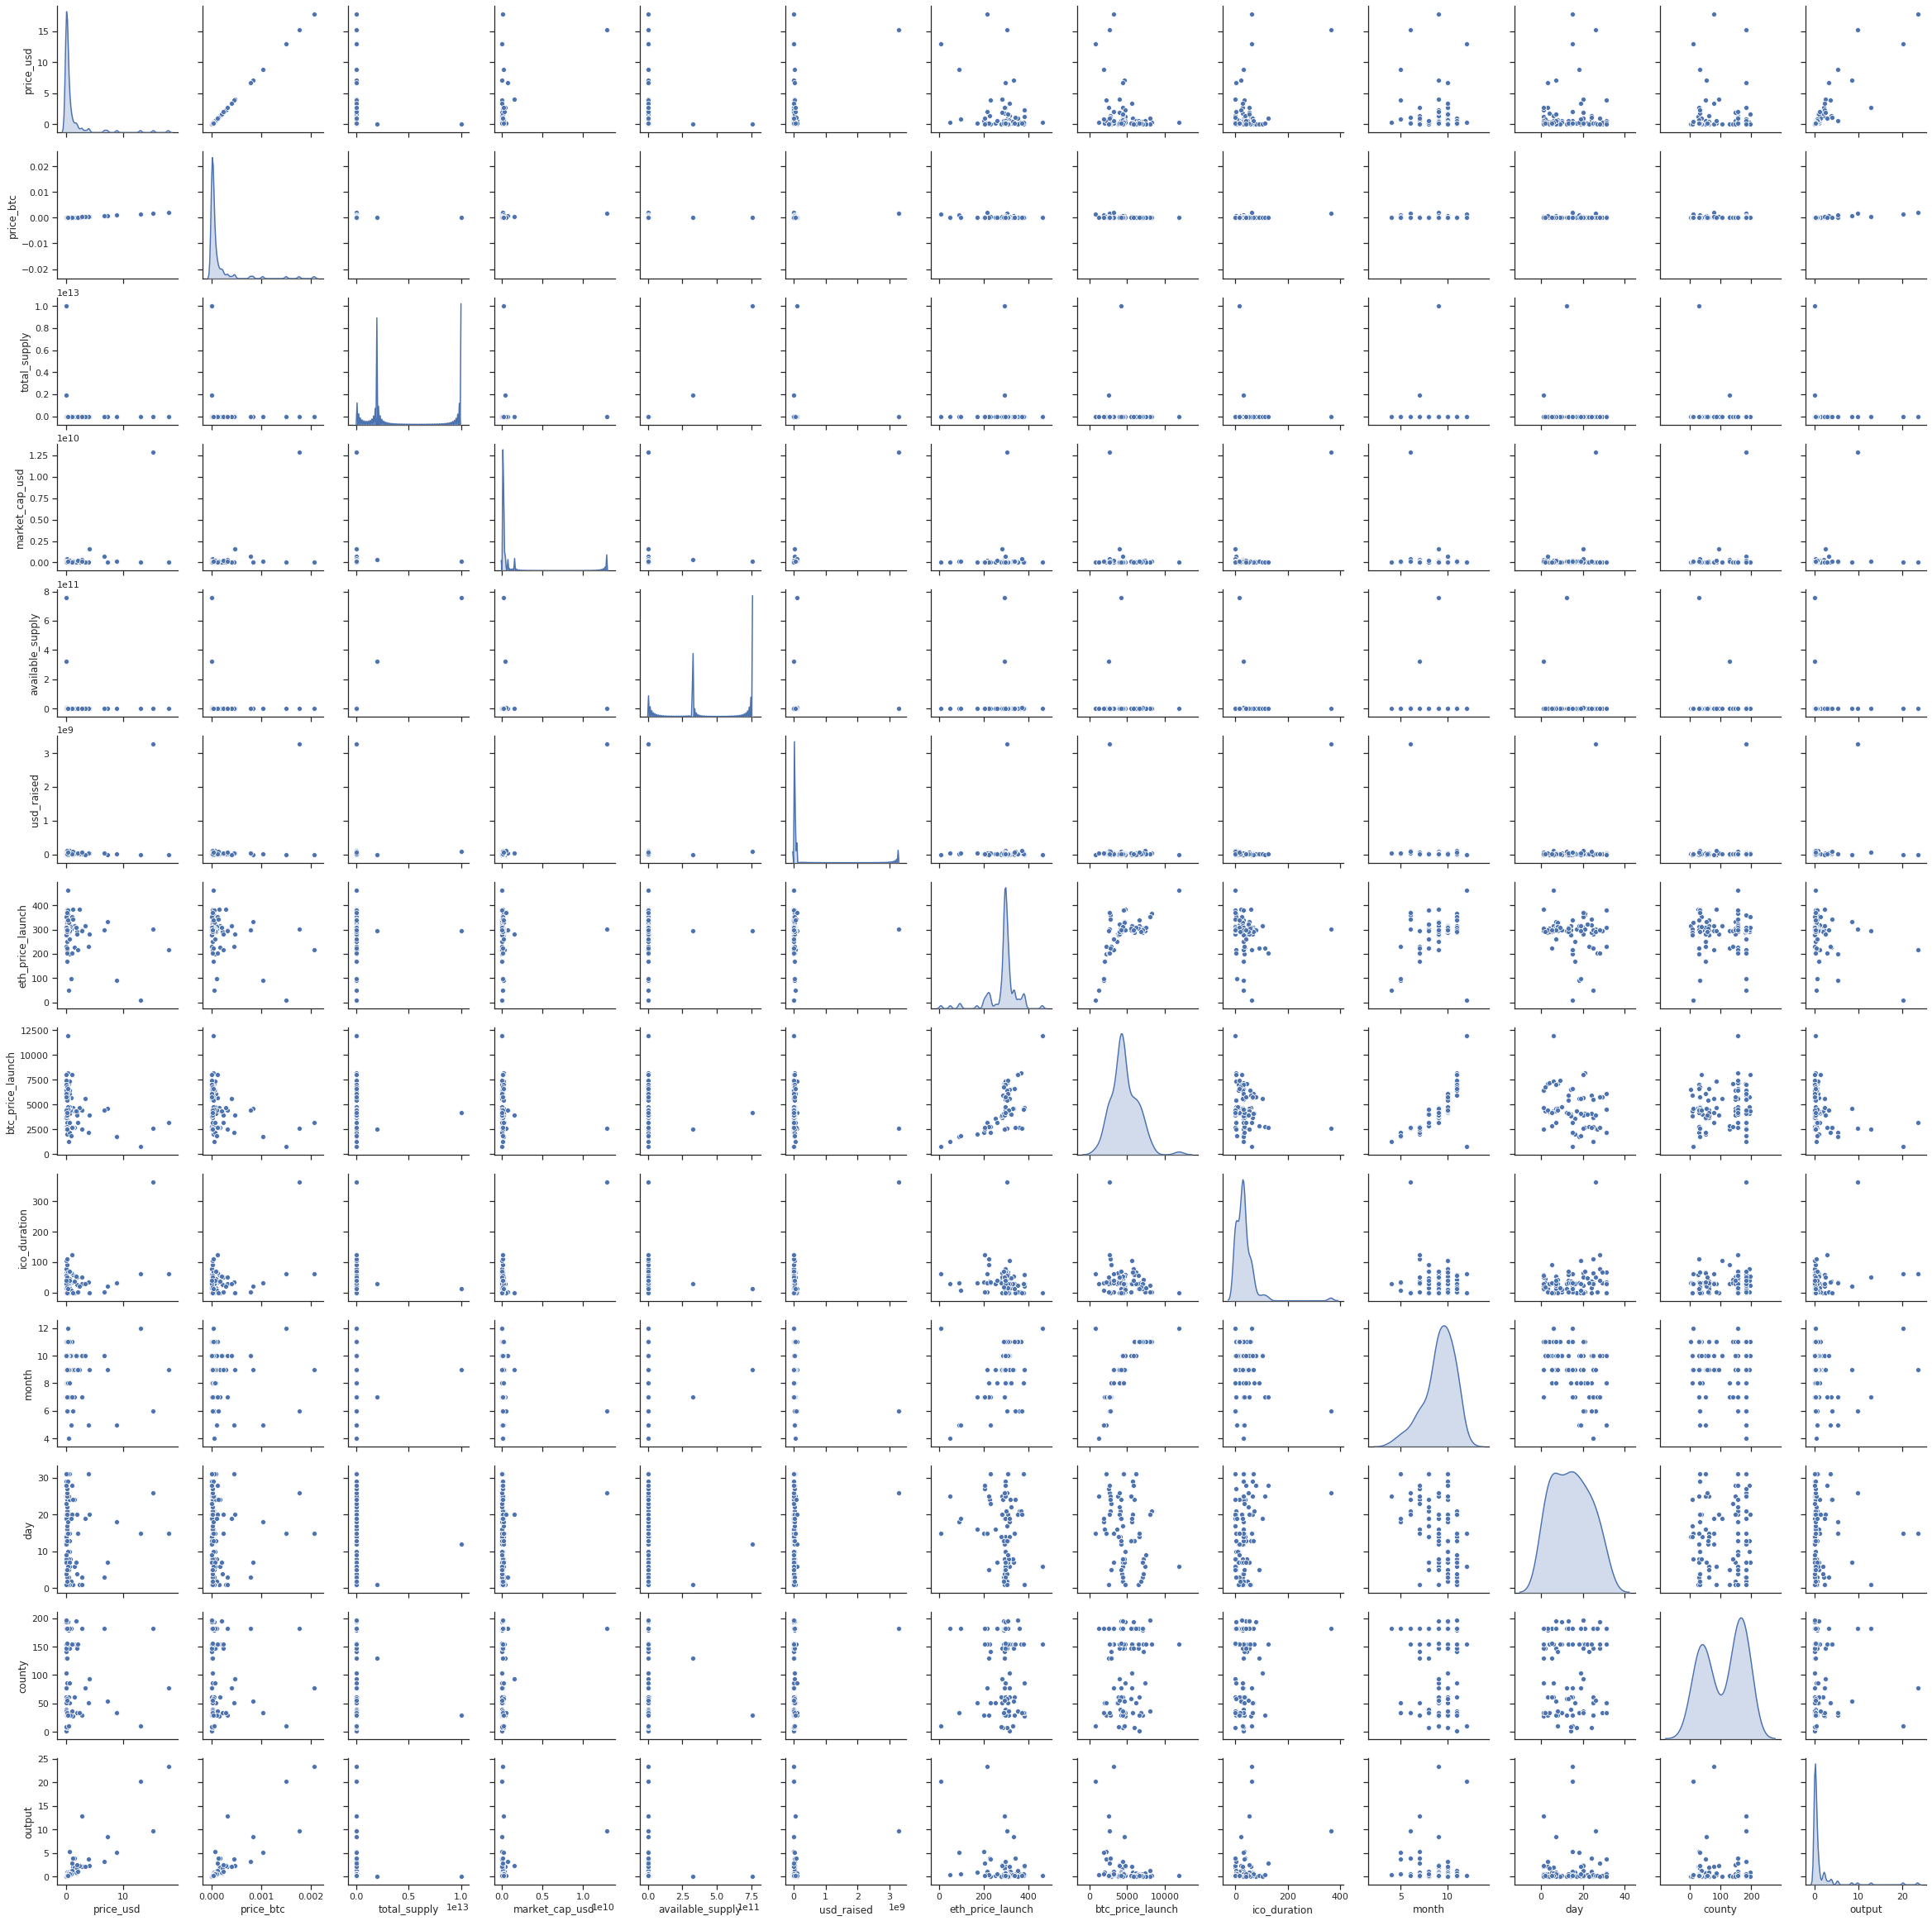

In [0]:
data = pd.DataFrame(data_com, columns= ['price_usd', 'price_btc', 'total_supply', 'market_cap_usd', 'available_supply', 'usd_raised', 'eth_price_launch',
                                        'btc_price_launch', 'ico_duration',
                                        'month','day','county', 'output'])
g = sns.pairplot(data, palette="husl",  diag_kind="kde")

### **MÃ HÓA VÀ PHÂN CHIA DỮ LIỆU**
Sử dụng one hot encoding để mã hóa các trường dữ liệu: ICO Date, ICO month launched and ICO country.

In [0]:
"""
MÃ HÓA VÀ PHÂN LOẠI DỮ LIỆU VÀ PHÂN LOẠI DỮ LIỆU
"""
def encodeData(x):
    enc = OneHotEncoder(handle_unknown='error', sparse=False)
    # Mã hóa one hot cho 4 4 trường dữ liệu ICO Date, ICO month launched and ICO country.
    encodedCategoryArray= enc.fit_transform(x[:,8:12])
    # Loại bỏ 4 trường dữ liệu đó từ dataset.
    allInputsExceptCategorical = np.delete(x, np.s_[8:12], axis=1)
    # Ghép các input còn lại với các trường mã hóa.
    encodedX = np.concatenate((allInputsExceptCategorical,encodedCategoryArray),axis=1)
    return encodedX

def encodeSingleElement(x, sample):
    enc = OneHotEncoder(handle_unknown='error', sparse=False)

    encodedCategoryArray= enc.fit(x[:,8:12])
    allInputsExceptCategorical = np.delete(sample, np.s_[8:12], axis=0)
    
    encodedCategories  = enc.transform(sample[8:12].reshape(1, -1))
    encodedX = np.concatenate((allInputsExceptCategorical,encodedCategories.flatten()),axis=0)
    return (encodedX, encodedCategoryArray)

In [0]:
encodeX = encodeData(x)

### **CHIA DATASET THÀNH TẬP TRAIN VÀ TẬP TEST**
80% cho tập train và 20% cho tập test. Sau đó trong tập train cũng chia 80/20 để tính toán.

In [0]:
X_cross, X_test_holdout, y_cross, y_test_holdout = train_test_split(encodeX, y, test_size=0.2, random_state = 42)

# **Ridge Regession**

---


Chia dữ liệu thành 80/20 từ trập train Ridge Regression

In [0]:
def ridgeRegression(x, y):       
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    regressor_Ridge = linear_model.RidgeCV(gcv_mode='svd', alphas = [0.6, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 10],
                                            normalize=True)
    regressor_Ridge.fit(X_train, y_train) 

    bestRegressionCoef_Ridge = regressor_Ridge.coef_    
    y_pred_Ridge = regressor_Ridge.predict(X_val)
    
    r2_Ridge = r2_score(y_val, y_pred_Ridge)    
    rMeanSquaredError_Ridge = sqrt(mean_squared_error(y_val, y_pred_Ridge))
    meanAbsoluteError = mean_absolute_error(y_val, y_pred_Ridge)  
      
    return (regressor_Ridge, rMeanSquaredError_Ridge, r2_Ridge, meanAbsoluteError, bestRegressionCoef_Ridge)

In [0]:
def ridgeRegression2(x,y):
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    ridge = linear_model.Ridge()
    sc = StandardScaler()
    # TẠO 1 ĐỐI TƯỢNG PCA
    pca = decomposition.PCA() 
    pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('ridge', ridge)])
    n_components = list(range(1, X_train.shape[1] + 1, 1))    
    normalize = [True, False ]
    solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    parameters = dict(pca__n_components=n_components,
                  ridge__normalize=normalize,
                  ridge__solver=solver)
    clf = GridSearchCV(pipe, parameters)
    # Fit the grid search
    regressor = clf.fit(X_train, y_train)       
    y_pred = regressor.predict(X_val)   
    #print('Best Number Of Components:', clf.best_estimator_)
    print(); print(clf.best_estimator_.get_params()['ridge'])  
    r2 = r2_score(y_val, y_pred)
    rMeanSquaredError = sqrt(mean_squared_error(y_val, y_pred))    
    coefRidge = clf.best_estimator_.named_steps['ridge'].coef_
    return (regressor, rMeanSquaredError, r2, coefRidge)   

In [0]:
def ridgeRegression3(x,y):
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    ridge = linear_model.Ridge(random_state = 0)
    #n_components = list(range(1, X_train.shape[1] + 1, 1))    
    normalize = [True, False]
    fit_interceptOptions = [True, False]
    solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    parameters = dict(ridge_alpha = [1.0, 1.1, 1.2],
                  ridge__normalize=normalize,
                  ridge_fit_intercept = fit_interceptOptions,
                  ridge__solver=solver)
    clf = GridSearchCV(estimator = ridge, param_grid = parameters)
    # Fit the grid search
    regressor = clf.fit(X_train, y_train)       
    y_pred = regressor.predict(X_val)   
    #print('Best Number Of Components:', clf.best_estimator_)
    print(); print(clf.best_estimator_.get_params()['ridge'])  
    r2 = r2_score(y_val, y_pred)
    rMeanSquaredError = sqrt(mean_squared_error(y_val, y_pred))    
    coefRidge = clf.best_estimator_.named_steps['ridge'].coef_
    return (regressor, rMeanSquaredError, r2, coefRidge)   

## **TÍNH TOÁN TRAINING ERROR VÀ TEST ERROR**
Tim hiểu xem model có bị hiện tượng overfitting

In [0]:
def trainingError(x,y):   
    regressor = linear_model.LinearRegression()
    regressor.fit(x, y)  
    y_pred_training = regressor.predict(x)
    trainingError = mean_squared_error(y, y_pred_training)     
    return (regressor, trainingError, y_pred_training) 

In [0]:
def testError(x, y, regressor):
    y_pred_holdout = regressor.predict(x)    
    test_error = mean_squared_error(y, y_pred_holdout)       
    return test_error, y_pred_holdout

#### **OVERFITTING**
Là hiện tượng quá khớp cụ thể là khớp hoàn toàn hoặc gận như hoàn toàn đối với tập train nhưng là rất tệ trên tập test.

TRAINING ERROR: 0.004421


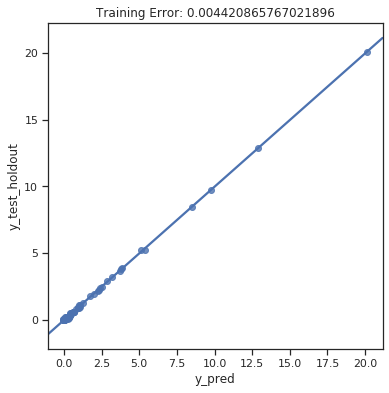

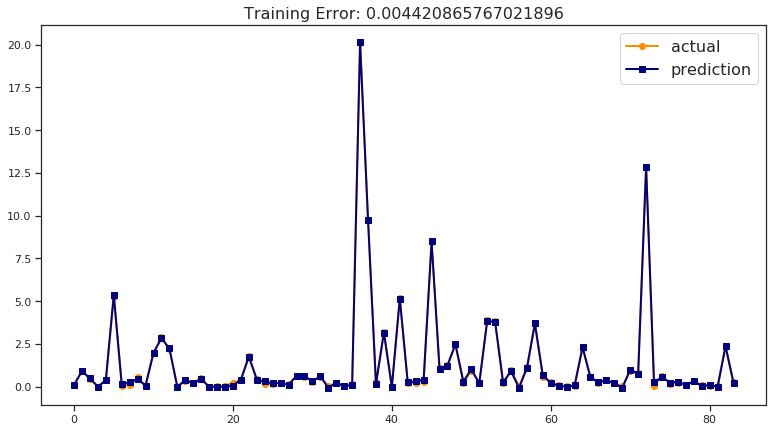

TEST ERROR: 6.153324
Predicted value: 
 
[-0.25159513 -3.97333152  1.88002622 -3.52559942 22.38261323 -0.73405129
 -0.0455922  -3.21256671 -2.41468644  4.92779024 -0.73748931 -1.95577619
  2.79529449 -0.28907522  5.54004018 -0.77256379 -2.52029702  0.90105227
 -1.04067911 -0.29205584 -2.29835684]
Actual value: 
 
[2.90140e-02 2.20648e-01 1.81330e-02 6.28870e-02 2.34100e+01 6.25696e-01
 2.74350e-01 4.75880e-02 3.48067e-01 2.19000e+00 9.03910e-02 5.92220e-02
 1.04190e-01 5.78119e-01 3.61564e-01 2.09000e+00 8.13417e-01 7.81000e-01
 3.96967e-01 4.68150e-02 2.19310e-02]


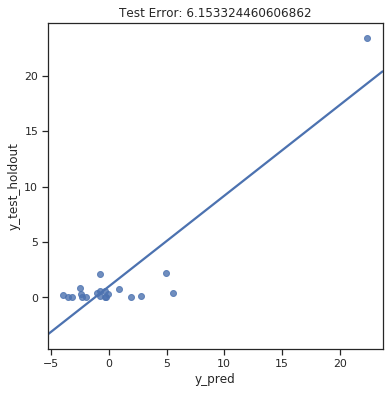

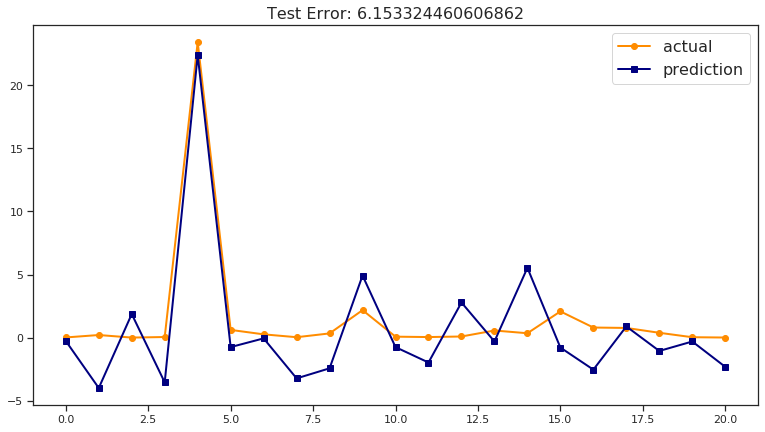

Predicted value ICO 0x (Actual value: 1.08) after 6 months:  [-3.0139239]


In [0]:
regressor, trainingError, y_pred_training = trainingError(X_cross, y_cross)  
test_error, y_pred_holdout = testError(X_test_holdout, y_test_holdout, regressor)
print("TRAINING ERROR: {:f}".format(trainingError))
heading = "Training Error: " + str(trainingError)
plotExpectedVsPredictedOutput2(y_cross, y_pred_training, fileName = heading, saveToFile = True)
line_plot(y_cross, y_pred_training, title= heading, lw=2)
print("TEST ERROR: {:f}".format(test_error))
heading = "Test Error: " + str(test_error)
print("Predicted value: \n ")
print(y_pred_holdout)
print("Actual value: \n ")
print(y_test_holdout)

plotExpectedVsPredictedOutput2(y_test_holdout, y_pred_holdout, fileName = heading, saveToFile = True)
line_plot(y_test_holdout, y_pred_holdout, title=heading, lw=2)

# ICO 0x CÓ GIÁ TRỊ DỰ ĐOÁN SAU 6 THÁNG LÀ 1.08
ico_0x= np.array([1.71456, 0.00019931, 1000000000, 905793616, 528295082, 24000000, 297.63, 3420.4, 7, 8, 9, 182])
y_pred1 = makePrediction(regressor, ico_0x)
print("Predicted value ICO 0x (Actual value: 1.08) after 6 months: ", y_pred1)

## **HÀM TỐI ƯU KẾT QUẢ**

In [0]:
"""
LƯU LẠI MODEL TỐT NHẤT.
"""
def saveBestModel(model,fileName):
    exists = os.path.isfile(fileName)    
    if exists:    
        joblib.load(fileName)
    else:
        joblib.dump(model, fileName)
        return    
    
    y_pred_holdout_saved_model = joblib.load(fileName).predict(X_test_holdout)
    rSquared_saved_model = r2_score(y_test_holdout, y_pred_holdout_saved_model)
    rMse_saved_model = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_saved_model))
    mAE_saved_model = mean_absolute_error(y_test_holdout, y_pred_holdout_saved_model)
    
   
    y_pred_holdout_new_model = model.predict(X_test_holdout)
    rSquared_new_model = r2_score(y_test_holdout, y_pred_holdout_new_model)
    rMse_new_model = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_new_model))
    mAE_new_model = mean_absolute_error(y_test_holdout, y_pred_holdout_new_model)
    
    #KIỂM TRA ĐIỀU KIỆN
    if(str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) in fileName):
        if(rMse_new_model < rMse_saved_model):
            joblib.dump(model, fileName) 
    elif(str(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR.name) in fileName):
        if(mAE_new_model < mAE_saved_model):
            joblib.dump(model, fileName) 
    else:
        if(rSquared_new_model > rSquared_saved_model and rSquared_new_model < 1):
            joblib.dump(model, fileName)  

In [0]:
def Optimize(metricToOptimize, numIterations, x, y, showOutput = True):
     
    # GIÁ TRỊ R2, rMSE, MAE CỦA HỒI QUY RIDGE
    maxRSquared_Ridge = -10000
    rMSEMin_Ridge = 10000
    meanABError_min = 10000   

    crossValidationMeanSquaredError = 1
    crossValidationMeanAbsoluteError = 1
    crossValidationR2Squared = 1
    bestRidgeModel = None 

    plotrMSE = []
    plotR2 = []
    plotMAE = []

  

    # HỆ SỐ HỒI QUY KHI SỬ DỤNG HỒI QUY RIDGE    
    bestRegressionCoef_temp_Ridge = np.array([])
    bestRegressionCoef_rMSE_Ridge = np.array([])
    bestRegressionCoef_R2_Ridge = np.array([])
    bestRegressionCoef_MAE_Ridge = np.array([])    

    for i in np.arange(numIterations):
        bestRegression_Ridge, rootMeanSquaredError_Ridge, rSquared_Ridge, meanAbsoluteError, bestRegressionCoef_temp_Ridge  = ridgeRegression(x, y)
              
#       TÌM GIÁ TRỊ rMSE TỐT NHẤT
        if(metricToOptimize == LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR):
            if(rootMeanSquaredError_Ridge < rMSEMin_Ridge):
                rMSEMin_Ridge = rootMeanSquaredError_Ridge              
                crossValidationMeanSquaredError = rootMeanSquaredError_Ridge
                plotrMSE.append(rootMeanSquaredError_Ridge)               
                bestRegressionCoef_rMSE_Ridge = bestRegressionCoef_temp_Ridge 
                bestRidgeModel = bestRegression_Ridge
            if(showOutput):
                print(i," bestrMSE: ", rMSEMin_Ridge)

        elif(metricToOptimize == LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR):
            if(meanAbsoluteError < meanABError_min):
                meanABError_min = meanAbsoluteError
                plotMAE.append(meanAbsoluteError)                             
                bestRegressionCoef_MAE_Ridge = bestRegressionCoef_temp_Ridge
                crossValidationMeanAbsoluteError = meanAbsoluteError
                bestRidgeModel = bestRegression_Ridge                   
            if(showOutput):
                print(i," bestrMAE: ", meanABError_min)                      
#      Tìm GIÁ TRỊ R2 TỐT NHẤT
        else:
            if(rSquared_Ridge > maxRSquared_Ridge and rSquared_Ridge > 0):
                maxRSquared_Ridge = rSquared_Ridge               
                bestRegressionCoef_R2_Ridge = bestRegressionCoef_temp_Ridge
                plotR2.append(rSquared_Ridge)  
                crossValidationR2Squared = rSquared_Ridge
                bestRidgeModel = bestRegression_Ridge                  
            if(showOutput):
                print(i,"bestRSquared:",maxRSquared_Ridge)   
   
   
          
    if(metricToOptimize == LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR):
        print(" \n Best rMSE: {:f} \n ,after running linear regression {:d} different times with different test and training combinations"
              .format(rMSEMin_Ridge,numIterations))
        print("Value alpha: ", bestRidgeModel.alpha_)     
        line_plot2(plotrMSE, title='Optimize value rMSE on validation data', 
                   label1='rMSE')      
        
    elif(metricToOptimize == LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR):
        print(" \n Best MAE: {:f} \n ,after running linear regression {:d} different times with different test and training combinations"
              .format(meanABError_min,numIterations))
        print("Value alpha: ", bestRidgeModel.alpha_)    
        line_plot2(plotMAE, title='Optimize value MAE on validation data',
                    label1='MAE')    
    else: 
       print(" \n Best RSquared: {:f} \n ,after running linear regression {:d} different times with different test and training combinations"
              .format(maxRSquared_Ridge,numIterations))
       print("Value alpha: ", bestRidgeModel.alpha_)    
       line_plot2(plotR2, title='Optimize value R2 on validation data', 
                   label1='R2')   
     
    if(showOutput):
        print(" \n Best regression coef rMSE: ", bestRegressionCoef_rMSE_RG,"\n")
        print(" \n Best regression coef R2: ", bestRegressionCoef_R2_RG,"\n")
        print(" \n Best regression coef MAE: ", bestRegressionCoef_MAE_Ridge,"\n")
    
    fileName_Ridge = "RESULT/" + "bestRegressionModel_Ridge_" + str(metricToOptimize.name) + ".sav"   
    saveBestModel(bestRidgeModel, fileName_Ridge)   

In [0]:
ico_0x = np.array([1.71456, 0.00019931, 1000000000, 905793616, 528295082, 24000000, 297.63, 3420.4, 7, 8, 9, 182])
ico_modum = np.array([2.36319, 0.00027471, 27266200, 43166501, 18266200, 13500000, 383.47, 4701.76, 21, 9, 1, 33])
ico_crypto20 = np.array([1.68825, 0.00019625, 40656082, 66992446, 39681591, 38222081, 308.89, 4369.35, 54, 10, 7, 196])
def Optimize2(numIterations, x, y):
    for i in np.arange(numIterations):
        bestRegression_Ridge, rootMeanSquaredError_Ridge, rSquared_Ridge, meanAbsoluteError, bestRegressionCoef_temp_Ridge  = ridgeRegression(x, y)
        y_pred_ico0x = makePrediction(bestRegression_Ridge, ico_0x)
        y_pred_modum = makePrediction(bestRegression_Ridge, ico_modum)
        y_pred_crypto20 = makePrediction(bestRegression_Ridge, ico_crypto20)
        y_pred_holdout = bestRegression_Ridge.predict(X_test_holdout) 
        rMSE_holdout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
        r2_holdout = r2_score(y_test_holdout, y_pred_holdout)
        holdout_MAE = mean_absolute_error(y_test_holdout, y_pred_holdout)
        print("TIME: ",i)
        print("Price ICO 0x (REAL: 1.08): ", y_pred_ico0x)
        print("Price ICO modum (REAL: 2.79): ", y_pred_modum)
        print("Price ICO crypto20 (REAL: 0.9876): ", y_pred_crypto20)
        print("Value rMSE: ", rMSE_holdout)
        print("Value R2: ", r2_holdout)
        print("Value MAE: ", holdout_MAE)
        print("**********************************************************************************")
        print("\n")

## **SO SÁNH CÁC THAM SỐ GIỮA HỒI QUY RIDGE VÀ HÔI QUY ĐA BIẾN**
Sau khi chạy tổ hợp 10000 lần khác nhau với tập huấn luyện

 
 Best rMSE: 0.549193 
 ,after running linear regression 20000 different times with different test and training combinations
Value alpha:  0.6


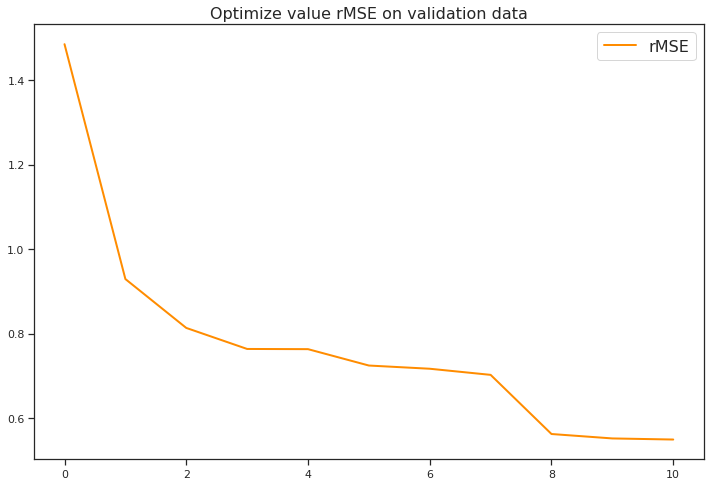

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.ridge module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeCV from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [0]:
n = 20000 # sô lần lặp
showOutput = False
saveToFile = False
Optimize(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR, n , X_cross, y_cross, showOutput)

 
 Best RSquared: 0.853503 
 ,after running linear regression 20000 different times with different test and training combinations
Value alpha:  0.6


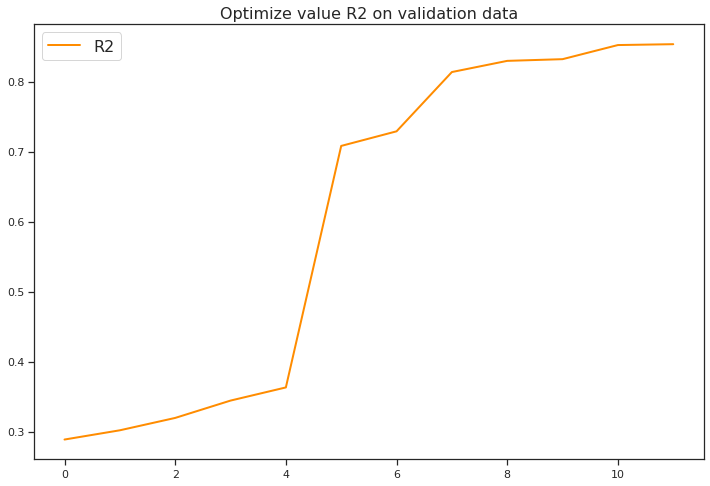

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeCV from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [0]:
n = 20000 # sô lần lặp
Optimize(LineaReggressionMetrics.R_SQUARED, n, X_cross, y_cross, showOutput)
#  https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

 
 Best MAE: 0.357703 
 ,after running linear regression 20000 different times with different test and training combinations
Value alpha:  0.6


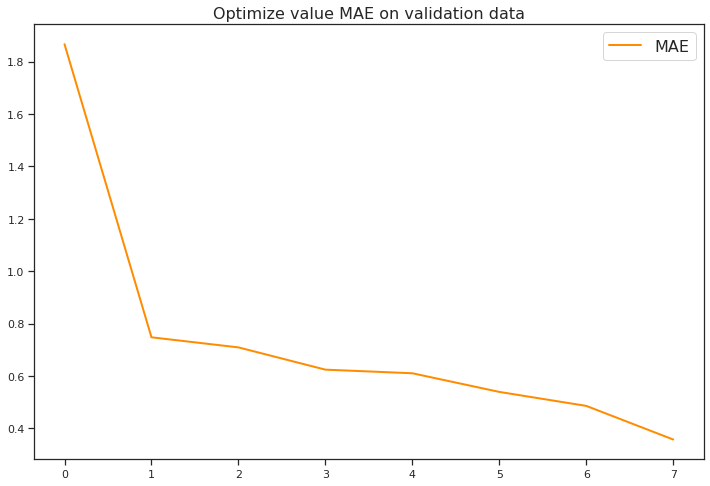

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeCV from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [0]:
n = 20000 # sô lần lặp
Optimize(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR, n, X_cross, y_cross, showOutput)

In [0]:
 Optimize2(10, X_cross, y_cross)

TIME:  0
Price ICO 0x (REAL: 1.08):  [1.2766951]
Price ICO modum (REAL: 2.79):  [1.8697725]
Price ICO crypto20 (REAL: 0.9876):  [1.05012594]
Value rMSE:  3.315958236200279
Value R2:  0.5465661547819528
Value MAE:  1.2603620568889529
**********************************************************************************


TIME:  1
Price ICO 0x (REAL: 1.08):  [1.72177825]
Price ICO modum (REAL: 2.79):  [2.77940806]
Price ICO crypto20 (REAL: 0.9876):  [1.18118669]
Value rMSE:  2.899080515258702
Value R2:  0.6534097162747294
Value MAE:  1.1627019912788938
**********************************************************************************


TIME:  2
Price ICO 0x (REAL: 1.08):  [1.74290979]
Price ICO modum (REAL: 2.79):  [2.98208335]
Price ICO crypto20 (REAL: 0.9876):  [1.90124887]
Value rMSE:  3.329431333152821
Value R2:  0.5428739676026784
Value MAE:  1.3240494371590577
**********************************************************************************


TIME:  3
Price ICO 0x (REAL: 1.08):  [1.62

### **LOAD MODEL ĐÃ LƯU VÀ VẼ BIỂU ĐỒ** 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeCV from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Predicted value when using best model rMSE: 
[ 0.40427984  0.3551598  -0.1479915  -0.55394692 20.93905002  0.86454273
  0.96122335  0.24794642  0.74028349  2.15997223  0.48476459 -0.16634763
  0.38664771  0.70474875  0.74506109  1.89507437  0.87084702  1.06192453
  0.91942606  0.05687469  0.20091363]
Actual value: 
[2.90140e-02 2.20648e-01 1.81330e-02 6.28870e-02 2.34100e+01 6.25696e-01
 2.74350e-01 4.75880e-02 3.48067e-01 2.19000e+00 9.03910e-02 5.92220e-02
 1.04190e-01 5.78119e-01 3.61564e-01 2.09000e+00 8.13417e-01 7.81000e-01
 3.96967e-01 4.68150e-02 2.19310e-02]


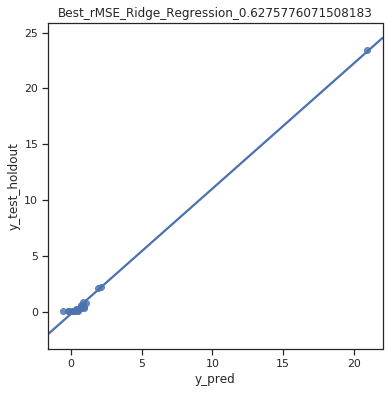

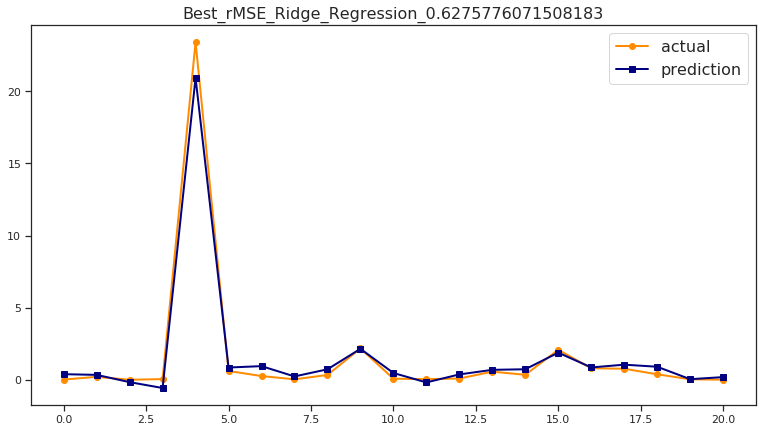

Regression coefficient when using best model rMSE: 
[ 2.47034353e-01  2.12511020e+03 -8.68037965e-15 -2.38370235e-10
 -5.06139777e-13  2.78265870e-09 -9.65923745e-04 -8.51690158e-05
 -1.01937104e-01 -2.55435884e-01  2.34045315e-02  0.00000000e+00
 -4.84931247e-01 -1.96582485e-01 -2.68025650e-01 -4.79666692e-01
 -6.06562895e-01  0.00000000e+00  7.78698124e-03  2.64831782e-01
  0.00000000e+00 -1.43482408e-01  0.00000000e+00  1.92303188e-01
  4.73750180e-02 -3.99296478e-01 -4.50140133e-01 -1.51771473e-01
 -4.29091218e-01 -1.13114910e-01  1.52059807e+00 -1.48432212e-01
 -3.71787853e-01  0.00000000e+00 -2.84524866e-01 -3.15015845e-01
  0.00000000e+00  0.00000000e+00 -2.17103481e-01 -2.51321875e-01
  6.19288208e+00 -1.71758180e-01 -5.73474748e-01 -9.06065816e-02
  6.09654768e-02  5.01677723e+00  0.00000000e+00  0.00000000e+00
 -7.40181549e-02 -2.29232726e-01 -3.68810115e-01  0.00000000e+00
 -2.16128369e-01  1.13920338e-01  0.00000000e+00 -7.78615301e-01
  4.97461841e-01  0.00000000e+00 -3.73

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeCV from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


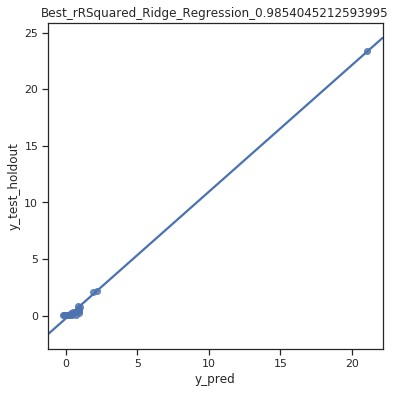

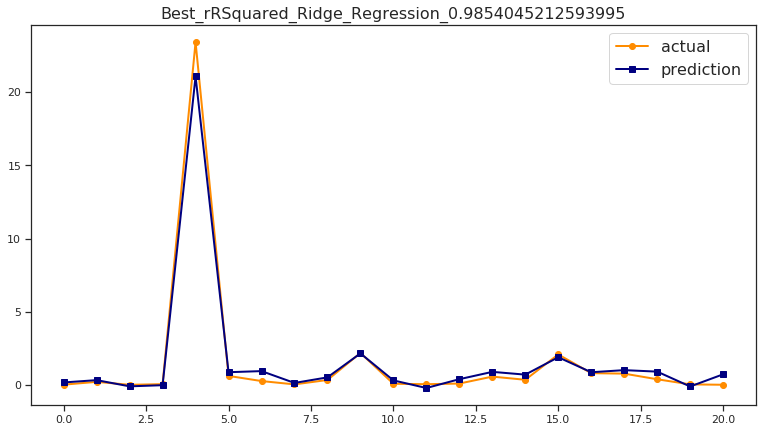

Regression coefficient when using best model R2: 
[ 2.70438913e-01  2.32642776e+03 -8.66224226e-15 -2.88626091e-10
 -5.17772708e-13  3.00305644e-09 -1.04045458e-03 -7.69156593e-05
 -7.63662218e-02 -4.16422902e-01  3.92512178e-04  0.00000000e+00
 -5.13173352e-01 -1.49872180e-01 -4.65755241e-01 -5.87895711e-01
 -5.94396661e-01 -2.19192952e-01  8.85576072e-02  2.42878450e-01
  0.00000000e+00  0.00000000e+00  8.58736096e-03  2.04839341e-01
  4.64449652e-02 -3.05168404e-01 -4.01350235e-01 -2.68348405e-01
 -3.50163052e-01 -1.30618821e-01  1.58219840e+00 -1.44153163e-01
 -4.21248292e-01  0.00000000e+00 -2.20372521e-01  0.00000000e+00
  1.43361543e-01  0.00000000e+00 -1.78587481e-01 -2.14718958e-01
  6.06500721e+00 -2.26399298e-01 -6.03972165e-01 -1.04877972e-01
  5.50668033e-02  4.75237246e+00  0.00000000e+00  0.00000000e+00
 -5.69994053e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.39431689e-01  1.41597265e-01 -9.92086420e-03 -7.13629631e-01
  4.58293581e-01  0.00000000e+00 -4.0401

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeCV from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


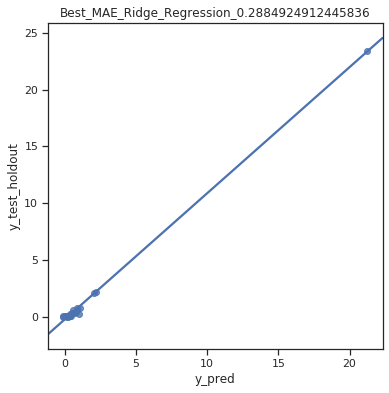

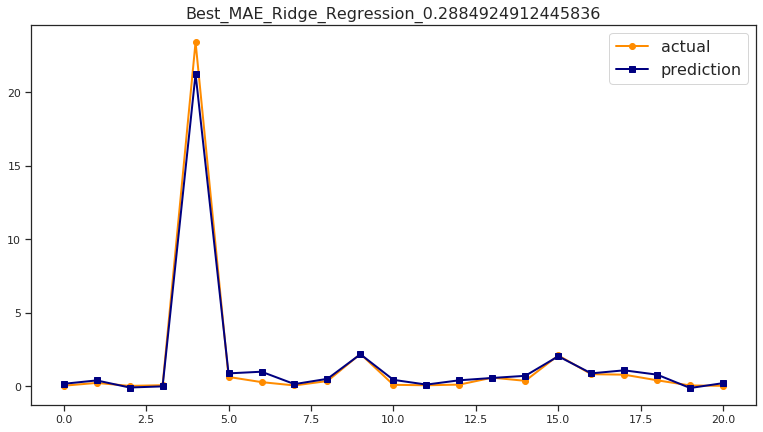

Regression coefficient when using best model MAE: 
[ 2.70438913e-01  2.32642776e+03 -8.66224226e-15 -2.88626091e-10
 -5.17772708e-13  3.00305644e-09 -1.04045458e-03 -7.69156593e-05
 -7.63662218e-02 -4.16422902e-01  3.92512178e-04  0.00000000e+00
 -5.13173352e-01 -1.49872180e-01 -4.65755241e-01 -5.87895711e-01
 -5.94396661e-01 -2.19192952e-01  8.85576072e-02  2.42878450e-01
  0.00000000e+00  0.00000000e+00  8.58736096e-03  2.04839341e-01
  4.64449652e-02 -3.05168404e-01 -4.01350235e-01 -2.68348405e-01
 -3.50163052e-01 -1.30618821e-01  1.58219840e+00 -1.44153163e-01
 -4.21248292e-01  0.00000000e+00 -2.20372521e-01  0.00000000e+00
  1.43361543e-01  0.00000000e+00 -1.78587481e-01 -2.14718958e-01
  6.06500721e+00 -2.26399298e-01 -6.03972165e-01 -1.04877972e-01
  5.50668033e-02  4.75237246e+00  0.00000000e+00  0.00000000e+00
 -5.69994053e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.39431689e-01  1.41597265e-01 -9.92086420e-03 -7.13629631e-01
  4.58293581e-01  0.00000000e+00 -4.040

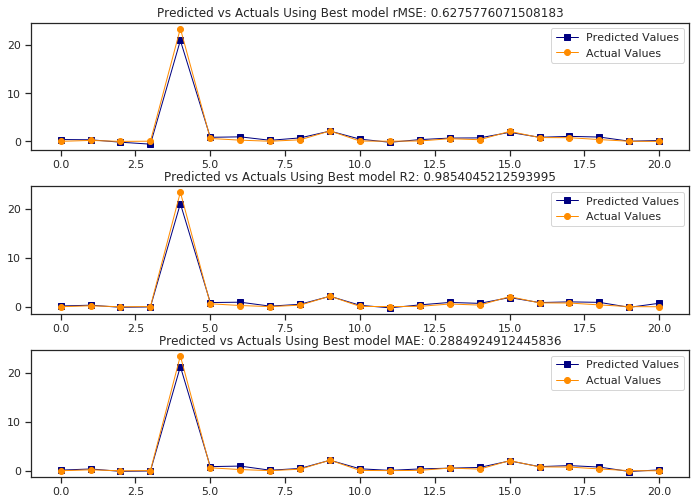

In [0]:
# LOAD MODEL SỬ DỤNG HỒI QUY RIDGE - rMSE
fileName1 = "RESULT/" + "bestRegressionModel_Ridge_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + ".sav"
bestRegression_rMSE_Ridge = loadModel(fileName1)
saveToFile = True
y_pred_holdout_rMSE = None
y_pred_holdout_R2 = None
y_pred_holdout_MAE = None

holdOutMeanSquaredError = None
holdOutValidationR2Squared = None
holdOutMeanABError = None

if(bestRegression_rMSE_Ridge):
    y_pred_holdout_rMSE = bestRegression_rMSE_Ridge.predict(X_test_holdout)  
    holdOutMeanSquaredError = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_rMSE))
    print("Predicted value when using best model rMSE: ")
    print(y_pred_holdout_rMSE)   
    print("Actual value: ")
    print(y_test_holdout)
    heading = "Best_rMSE_Ridge_Regression_" + str(holdOutMeanSquaredError)
    plotExpectedVsPredictedOutput2(y_test_holdout, y_pred_holdout_rMSE, heading, saveToFile)
    #plotExpectedVsPredictedOutput(y_test_holdout, y_pred_holdout_rMSE, heading, saveToFile)
    line_plot(y_test_holdout, y_pred_holdout_rMSE, title=heading, lw=2)
    print("Regression coefficient when using best model rMSE: ")  
    print(bestRegression_rMSE_Ridge.coef_)
    print("************************************************************************************************")
    print("\n")

# LOAD MODEL SỬ DỤNG HỒI QUY RIDGE - R2
fileName3 = "RESULT/" + "bestRegressionModel_Ridge_" + str(LineaReggressionMetrics.R_SQUARED.name) + ".sav"
bestRegression_rSquared_Ridge = loadModel(fileName3)

if(bestRegression_rSquared_Ridge):
    y_pred_holdout_R2 = bestRegression_rSquared_Ridge.predict(X_test_holdout)   
    holdOutValidationR2Squared = r2_score(y_test_holdout, y_pred_holdout_R2)
    print("Predicted value when using best model R2: ")
    print(y_pred_holdout_R2)
    print("Actual value: ")
    print(y_test_holdout)
    heading = "Best_rRSquared_Ridge_Regression_" + str(holdOutValidationR2Squared)
    plotExpectedVsPredictedOutput2(y_test_holdout, y_pred_holdout_R2,heading, saveToFile)
    #plotExpectedVsPredictedOutput(y_test_holdout, y_pred_holdout_R2,heading, saveToFile)
    line_plot(y_test_holdout, y_pred_holdout_R2, title=heading, lw=2)
    print("Regression coefficient when using best model R2: ")
    print(bestRegression_rSquared_Ridge.coef_) 
    print("************************************************************************************************")
    print("\n")

fileName4 = "RESULT/" + "bestRegressionModel_Ridge_" + str(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR.name) + ".sav"
bestRegression_MAE_Ridge = loadModel(fileName4)

if(bestRegression_MAE_Ridge):
    y_pred_holdout_MAE = bestRegression_MAE_Ridge.predict(X_test_holdout)   
    holdOutMeanABError = mean_absolute_error(y_test_holdout, y_pred_holdout_MAE)
    print("Predicted value when using best model MAE: ")
    print(y_pred_holdout_MAE)
    print("Actual value: ")
    print(y_test_holdout)
    heading = "Best_MAE_Ridge_Regression_" + str(holdOutMeanABError)
    plotExpectedVsPredictedOutput2(y_test_holdout,y_pred_holdout_MAE,heading,saveToFile)
    #plotExpectedVsPredictedOutput(y_test_holdout,y_pred_holdout_MAE,heading,saveToFile)
    line_plot(y_test_holdout, y_pred_holdout_MAE, title=heading, lw=2)    
    print("Regression coefficient when using best model MAE: ")
    print(bestRegression_rSquared_Ridge.coef_)

plotResult(y_test_holdout, y_pred_holdout_rMSE, y_pred_holdout_R2, y_pred_holdout_MAE, rMSE = str(holdOutMeanSquaredError), 
           R2 = str(holdOutValidationR2Squared), MAE = str(holdOutMeanABError))

## **SỬ DỤNG MODEL ĐỂ DỰ ĐOÁN - GIÁ TRỊ CỦA ICO SAU 6 THÁNG**

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeCV from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeCV from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RidgeCV from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Price of 3 ICO when using best mode rMSE
Predicted value of ICO 0x (real price: 1.08) after 6 months:  [1.00028127]
Predicted value of ICO modum (real price: 2.79) after 6 months:  [2.65956047]
Predicted value of ICO crypto20 (real price: 0.9786) after 6 months:  [1.06192453]
Value rMSE, R2, MAE of best model rMSE
Value rMSE:  0.6275776071508183
Value R2:  0.9837583290576853
Value MAE:  0.37949134060224865
*******************************************************************************************


Price of 3 ICO when using best mode R2
Predicted value of ICO 0x (real price: 1.08) after 6 months:  [0.99753229]
Predicted value of ICO modum (real price: 2.79) after 6 months:  [2.6703733]
Predicted value of ICO crypto20 (real price: 0.9786) after 6 months:  [1.02001219]
Value rMSE, R2, MAE of best model R2
Value rMSE:  0.5949236826297152
Value R2:  0.9854045212593995
Value MAE:  0.3499566635529081
*******************************************************************************************


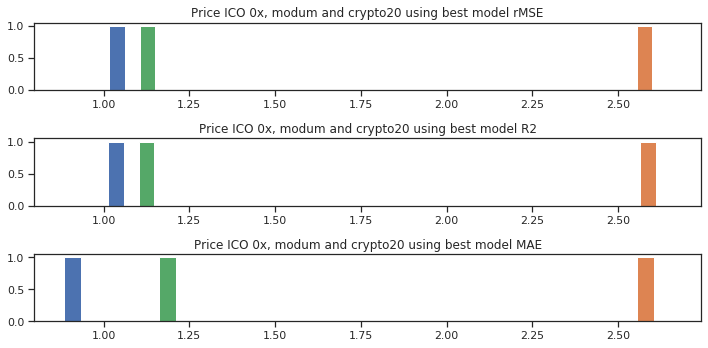

In [0]:
# LOAD MODEL VỚI GIÁ TRỊ rMSE LÀ TỐT NHẤT
fileName1 = "RESULT/" + "bestRegressionModel_Ridge_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + ".sav"
bestRegression_rMSE_Ridge = joblib.load(fileName1)
price_rMSE = []
price_R2 = []
price_MAE = []
#price_usd,price_btc,total_supply,market_cap_usd,available_supply,usd_raised,eth_price_launch,btc_price_launch,ico_duration,month,day,country
ico_0x = np.array([1.71456, 0.00019931, 1000000000, 905793616, 528295082, 24000000, 297.63, 3420.4, 7, 8, 9, 182])
ico_modum = np.array([2.36319, 0.00027471, 27266200, 43166501, 18266200, 13500000, 383.47, 4701.76, 21, 9, 1, 33])
ico_crypto20 = np.array([1.68825, 0.00019625, 40656082, 66992446, 39681591, 38222081, 308.89, 4369.35, 54, 10, 7, 196])
ico_wanchin = np.array([6.71639, 0.00078075, 210000000, 712961540, 106152493, 35704520, 297.48, 4408.46, 1, 10, 3, 182])
y_pred1 = makePrediction(bestRegression_rMSE_Ridge, ico_0x)
y_pred2 = makePrediction(bestRegression_rMSE_Ridge, ico_modum)
y_pred3 = makePrediction(bestRegression_rMSE_Ridge, ico_crypto20)
price_rMSE.append(y_pred1)
price_rMSE.append(y_pred2)
price_rMSE.append(y_pred3)
y_pred_holdout_rMSE = bestRegression_rMSE_Ridge.predict(X_test_holdout) 
rMSE_holdout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_rMSE))
r2_holdout = r2_score(y_test_holdout, y_pred_holdout_rMSE)
holdout_MAE  = mean_absolute_error(y_test_holdout, y_pred_holdout_rMSE)
print("Price of 3 ICO when using best mode rMSE")
print("Predicted value of ICO 0x (real price: 1.08) after 6 months: ",y_pred1)
print("Predicted value of ICO modum (real price: 2.79) after 6 months: ",y_pred2)
print("Predicted value of ICO crypto20 (real price: 0.9786) after 6 months: ",y_pred3)
print("Value rMSE, R2, MAE of best model rMSE")
print("Value rMSE: ", rMSE_holdout)
print("Value R2: ", r2_holdout)
print("Value MAE: ", holdout_MAE)
print("*******************************************************************************************")
print("\n")

# LOAD MODEL VỚI GIÁ TRỊ R2 LÀ TỐT NHẤT
fileName2 = "RESULT/" + "bestRegressionModel_Ridge_" + str(LineaReggressionMetrics.R_SQUARED.name) + ".sav"
bestRegression_rSquared_Ridge = joblib.load(fileName2)
y_pred4 = makePrediction(bestRegression_rSquared_Ridge, ico_0x)
y_pred5 = makePrediction(bestRegression_rSquared_Ridge, ico_modum)
y_pred6 = makePrediction(bestRegression_rSquared_Ridge, ico_crypto20)
price_R2.append(y_pred4)
price_R2.append(y_pred5)
price_R2.append(y_pred6)
y_pred_holdout_R2 = bestRegression_rSquared_Ridge.predict(X_test_holdout) 
rMSE_holdout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_R2))
r2_holdout = r2_score(y_test_holdout, y_pred_holdout_R2)
holdout_MAE  = mean_absolute_error(y_test_holdout, y_pred_holdout_R2)
print("Price of 3 ICO when using best mode R2")
print("Predicted value of ICO 0x (real price: 1.08) after 6 months: ",y_pred4)
print("Predicted value of ICO modum (real price: 2.79) after 6 months: ",y_pred5)
print("Predicted value of ICO crypto20 (real price: 0.9786) after 6 months: ",y_pred6)
print("Value rMSE, R2, MAE of best model R2")
print("Value rMSE: ", rMSE_holdout)
print("Value R2: ", r2_holdout)
print("Value MAE: ", holdout_MAE)
print("*******************************************************************************************")
print("\n")

# LOAD MODEL VỚI GIÁ TRỊ MAE LÀ TỐT NHẤT
fileName3 = "RESULT/" + "bestRegressionModel_Ridge_" + str(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR.name) + ".sav"
bestRegression_MAE_Ridge = joblib.load(fileName3)
y_pred7 = makePrediction(bestRegression_MAE_Ridge, ico_0x)
y_pred8 = makePrediction(bestRegression_MAE_Ridge, ico_modum)
y_pred9 = makePrediction(bestRegression_MAE_Ridge, ico_crypto20)
price_MAE.append(y_pred7)
price_MAE.append(y_pred8)
price_MAE.append(y_pred9)
y_pred_holdout_MAE = bestRegression_MAE_Ridge.predict(X_test_holdout) 
rMSE_holdout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_MAE))
r2_holdout = r2_score(y_test_holdout, y_pred_holdout_MAE)
holdout_MAE  = mean_absolute_error(y_test_holdout, y_pred_holdout_MAE)
print("Price of 3 ICO when using best mode MAE")
print("Predicted value of ICO 0x (real price: 1.08) after 6 months: ",y_pred7)
print("Predicted value of ICO modum (real price: 2.79) after 6 months: ",y_pred8)
print("Predicted value of ICO crypto20 (real price: 0.9786) after 6 months: ",y_pred9)
print("Value rMSE, R2, MAE of best model MAE")
print("Value rMSE: ", rMSE_holdout)
print("Value R2: ", r2_holdout)
print("Value MAE: ", holdout_MAE)
print("*******************************************************************************************")
print("\n")
plotPredicted(price_rMSE, price_R2, price_MAE)

# **Neural Network**

Các hàm dùng để chạy NN với nhiều cấu hình khác nhau.

In [0]:
class Activations(Enum):
    identity = 1
    logistic = 2
    tanh    = 3
    relu = 4  


In [0]:
## LƯU MODEL NẾU MODEL TỐT HƠN MODEL ĐÃ LƯU TRƯỚC ĐÓ
def saveBestModelNN(model, fileName):
    exists = os.path.isfile(fileName)
    if exists:    
        # LOAD MODEL ĐÃ LƯU
        bestSavedNNModel = joblib.load(fileName)
    else:
        # LƯU MODEL HIỆN TẠI
        joblib.dump(model, fileName)
        return
    y_pred_holdout_saved_model = bestSavedNNModel.predict(X_test_holdout)
    rSquared_saved_model = r2_score(y_test_holdout, y_pred_holdout_saved_model)
    rMse_saved_model = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_saved_model))
    mAE_saved_model = mean_absolute_error(y_test_holdout, y_pred_holdout_saved_model)
    
    #Scores CHO MODEL MỚI
    y_pred_holdout_new_model = model.predict(X_test_holdout)
    rSquared_new_model = r2_score(y_test_holdout, y_pred_holdout_new_model)
    rMse_new_model = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_new_model))
    mAE_new_model = mean_absolute_error(y_test_holdout, y_pred_holdout_new_model)  
    
    if(str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) in fileName):
        if(rMse_new_model < rMse_saved_model):
            joblib.dump(model, fileName) 
    elif(str(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR.name) in fileName):
        if(mAE_new_model < mAE_saved_model):
           joblib.dump(model, fileName)  
    else:
        if(rSquared_new_model > rSquared_saved_model and rSquared_new_model > 0):
            joblib.dump(model, fileName)   


In [0]:
# HÀM runNN DÙNG ĐỂ TÍNH TOÁN VÀ TRẢ VỀ CÁC GIÁ TRỊ R2, rMSE, model, y_val là validation
def runNN(x_input, y_input, hidden_layer_size, chosen_solver, chosen_activation):
    X_train, X_val, y_train, y_val = train_test_split(x_input, y_input, test_size = 0.2, random_state = 0)

    mlp = MLPRegressor(hidden_layer_sizes=(hidden_layer_size, hidden_layer_size, hidden_layer_size), max_iter= 60000, 
                       activation=chosen_activation, solver=chosen_solver, learning_rate='adaptive', tol=0.001)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_val)  

    R2coefficient = r2_score(y_val, y_pred)
    rMeanSquaredError = sqrt(mean_squared_error(y_val, y_pred))
    meanAbsoluteError = mean_squared_error(y_val, y_pred)
    
    return R2coefficient, rMeanSquaredError, meanAbsoluteError, mlp

In [0]:
def runNeuralNetOptimizer(metricToOptimize, x_input, y_input, maxIterations, maxHiddenLayerSize, activation, solver, hiddenLayerStepSize=100, showOutput=False):
    bestNeuralNetworkModel = None 
    minrMSE = 10000
    maxR2coefficient = -10000
    minMAE = 10000
    plotrMSE = []
    plotR2 = []
    plotMAE = []
 
    
    # CHẠY NN VỚI NHIỀU KÍCH THƯỚC LỚP ẨN KHÁC NHAU  
    for i in np.arange(maxIterations):
             for hidden_layer_size in np.arange(1, maxHiddenLayerSize, hiddenLayerStepSize):               
                chosen_activation = activation
                chosen_solver = solver
                currentR2coefficient, currentrMSE, currentMAE, neuralNetworkModel = runNN(x_input, y_input, hidden_layer_size, chosen_solver, chosen_activation)
               
                if(metricToOptimize == LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR):
                    if(minrMSE > currentrMSE ):
                        minrMSE = currentrMSE
                        minMAE = currentMAE
                        maxR2coefficient = currentR2coefficient
                        plotrMSE.append(currentrMSE)                        
                        bestNeuralNetworkModel = neuralNetworkModel                        
                        
                elif(metricToOptimize == LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR):
                    if(minMAE > currentMAE):
                         minrMSE = currentrMSE
                         minMAE = currentMAE
                         maxR2coefficient = currentR2coefficient 
                         bestNeuralNetworkModel = neuralNetworkModel
                         plotMAE.append(currentMAE)                                          
                else:
                    if(maxR2coefficient < currentR2coefficient and currentR2coefficient > 0):
                         minrMSE = currentrMSE
                         minMAE = currentMAE
                         maxR2coefficient = currentR2coefficient 
                         bestNeuralNetworkModel = neuralNetworkModel
                         plotR2.append(currentR2coefficient)               
                                                  
                        
    if(bestNeuralNetworkModel):
        print("Best rMSE for NN, using validation data: " + str(minrMSE))
        print("Best rSquared for NN, using validation data: " + str(maxR2coefficient))
        print("Best MAE for NN, using validation data: " + str(minMAE))

        #Best values for NN using cross validation
        y_pred_holdout = bestNeuralNetworkModel.predict(X_test_holdout)       
        if(metricToOptimize == LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR):
            rMeanSquaredErrorHoldout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
            print("Best rMSE for NN, using holdout data: " + str(rMeanSquaredErrorHoldout))
            line_plot2(plotrMSE, title='Optimize value rMSE validation data when using solver ' + solver, 
                   label1='rMSE') 
        elif(metricToOptimize == LineaReggressionMetrics.R_SQUARED):
            R2coefficientHoldout = r2_score(y_test_holdout, y_pred_holdout)
            print("Best rSquared for NN, using holdout data: " + str(R2coefficientHoldout))
            line_plot2(plotR2, title='Optimize value R2 validation data when using solver ' + solver, 
                   label1='R2') 
        else:
            meanAbsoluteErrorHoldout= mean_absolute_error(y_test_holdout, y_pred_holdout)
            print("Best MAE for NN, using holdout data: " + str(meanAbsoluteErrorHoldout))
            line_plot2(plotMAE, title='Optimize value MAE validation data when using solver ' + solver, 
                   label1='MAE')   
        
        #Save best model
        fileName = "RESULT/" + "bestNNModel_" + str(metricToOptimize.name) + solver + ".sav"
        saveBestModelNN(bestNeuralNetworkModel,  fileName)

In [0]:
def runNeuralNetOptimizations2(x_input, y_input, maxIterations, maxHiddenLayerSize, activation, solver, metricToOptimize, hiddenLayerStepSize=100,showOutput=False):
    runNeuralNetOptimizer(metricToOptimize, x_input, y_input, maxIterations, maxHiddenLayerSize, activation, solver, hiddenLayerStepSize,showOutput)

In [0]:
maxIterations = 5
maxHiddenLayerSize = 1000
hiddenLayerStepSize = 100

In [0]:
def findBestParametersNN(metricToOptimize):
    y_preds = np.array([])
    rMse = np.array([])
    y_actual = np.array([])
    
    # Using tanh activation function, with Adam Solver
    print("Using tanh activation function, with Adam Solver")
    runNeuralNetOptimizations2(X_cross, y_cross, maxIterations, maxHiddenLayerSize,
                               Activations.tanh.name, Solvers.adam.name, metricToOptimize, hiddenLayerStepSize)
    print("\n")
    
    # Using tanh activation function, with Gradient Descent Solver
    print("Using tanh activation function, with Gradient Descent Solver")
    runNeuralNetOptimizations2(X_cross,y_cross, maxIterations, maxHiddenLayerSize,
                               Activations.tanh.name, Solvers.sgd.name, metricToOptimize, hiddenLayerStepSize)
    print("\n")


## TÌM RA CÁC GIÁ TRỊ rMSE TỐT NHẤT

Using tanh activation function, with Adam Solver
Best rMSE for NN, using validation data: 0.31818597985771807
Best rSquared for NN, using validation data: 0.4698374612119157
Best MAE for NN, using validation data: 0.10124231777801618
Best rMSE for NN, using holdout data: 3.284387321132174


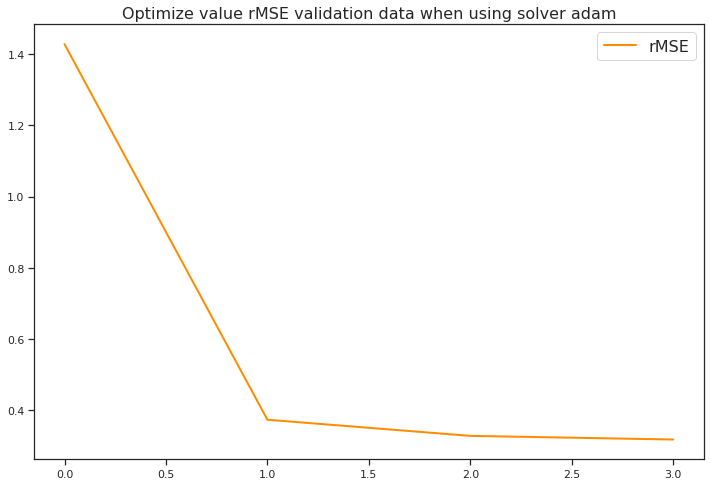



Using tanh activation function, with Gradient Descent Solver
Best rMSE for NN, using validation data: 0.2983891428419207
Best rSquared for NN, using validation data: 0.5337562834142568
Best MAE for NN, using validation data: 0.08903608056593615
Best rMSE for NN, using holdout data: 3.6503461340140113


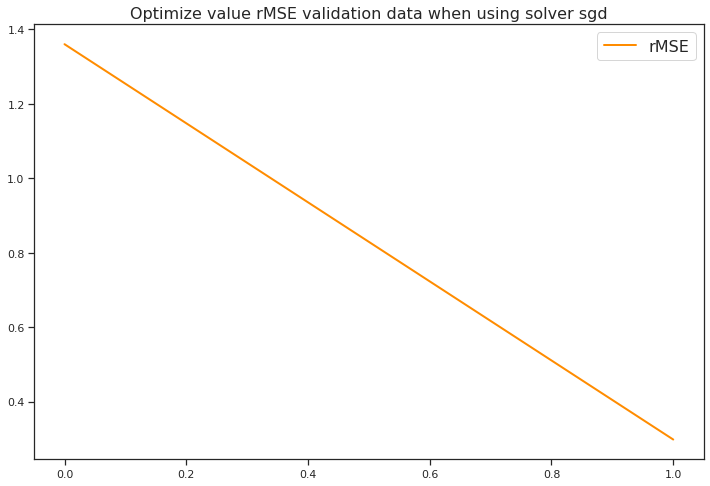

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [0]:
findBestParametersNN(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR)

##TÌM RA GIÁ TRỊ R2 TỐT NHẤT

Using tanh activation function, with Adam Solver
Best rMSE for NN, using validation data: 0.3782618113750437
Best rSquared for NN, using validation data: 0.2507410246022572
Best MAE for NN, using validation data: 0.14308199794472917
Best rSquared for NN, using holdout data: 0.678587542905992


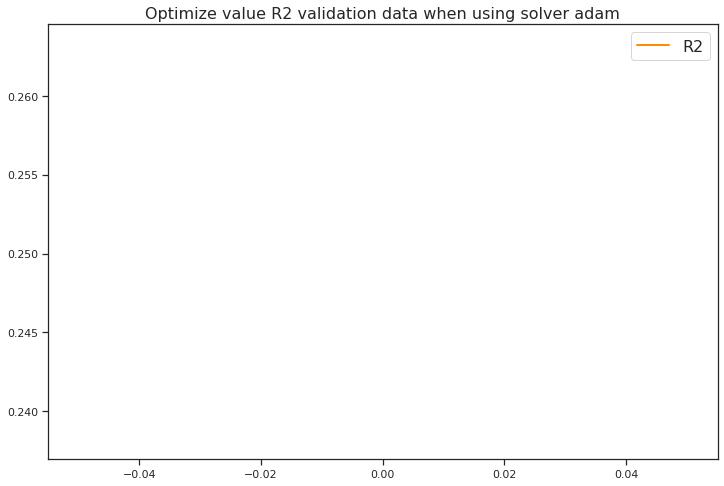



Using tanh activation function, with Gradient Descent Solver
Best rMSE for NN, using validation data: 0.3425000877384182
Best rSquared for NN, using validation data: 0.38571723224199517
Best MAE for NN, using validation data: 0.11730631010082417
Best rSquared for NN, using holdout data: 0.552717749679287


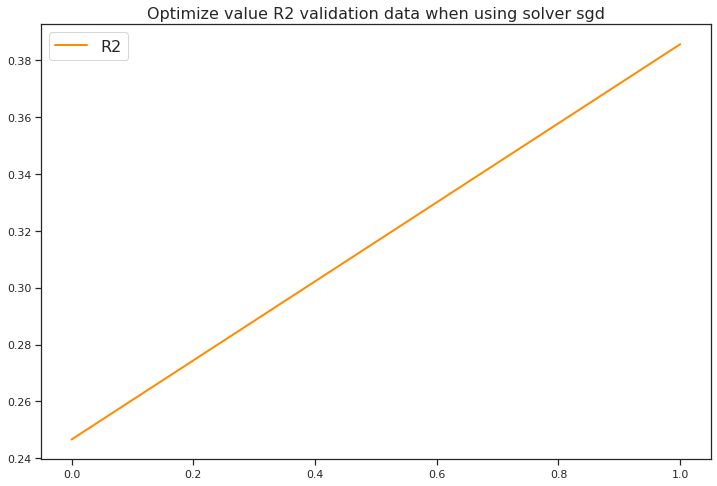

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [0]:
findBestParametersNN(LineaReggressionMetrics.R_SQUARED)

##TÌM RA GIÁ TRỊ MAE TỐT NHẤT

Using tanh activation function, with Adam Solver
Best rMSE for NN, using validation data: 0.47269059145192
Best rSquared for NN, using validation data: -0.1700404451587667
Best MAE for NN, using validation data: 0.22343639524716596
Best MAE for NN, using holdout data: 0.9542336526587674


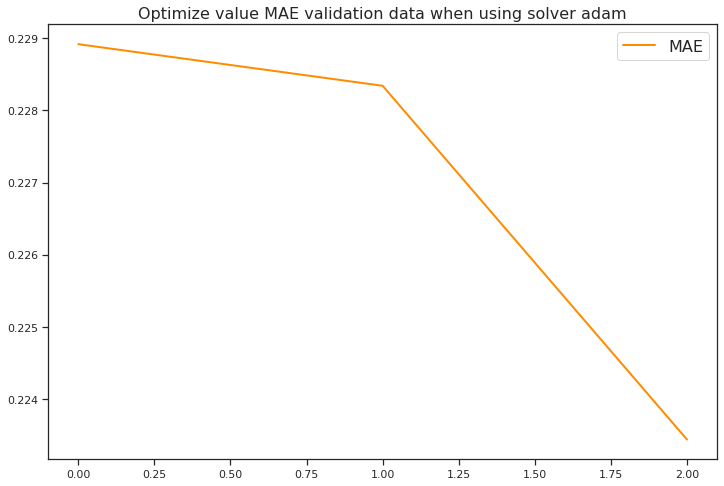



Using tanh activation function, with Gradient Descent Solver
Best rMSE for NN, using validation data: 0.32009923269282725
Best rSquared for NN, using validation data: 0.46344255606973184
Best MAE for NN, using validation data: 0.10246351877053678
Best MAE for NN, using holdout data: 1.1457867847601482


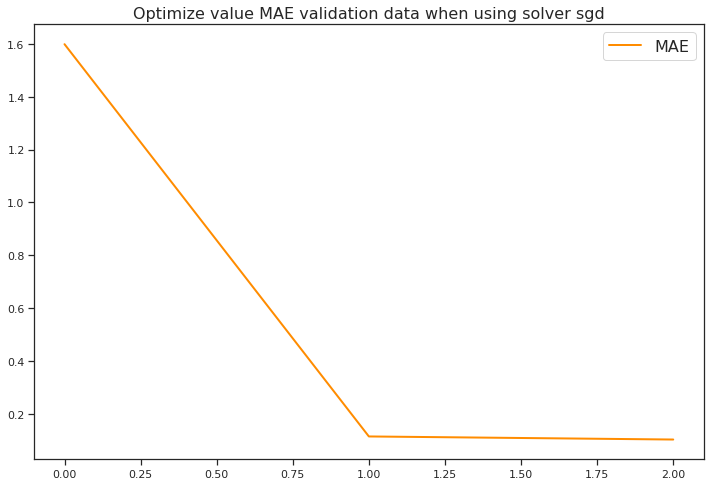

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.19.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [0]:
findBestParametersNN(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR)

## LOAD MODEL TỐI ƯU ĐÃ LƯU VÀ TÍNH TOÁN HIỆU NĂNG

Predicted value when using best model rMSE (NN with Solver is adam): 
[-3.42667046e-01  2.61415106e-01 -1.94786913e-02 -5.44711128e-01
  8.62290391e+00  5.45460183e-01  3.55068941e-01  1.46769633e-01
  4.49537069e-01  1.99360150e+00 -2.09293625e-01 -7.51586183e-02
  4.32116165e-01  1.21901804e+00 -6.88670191e-01  4.02739459e+00
  1.68146926e-01 -4.16813855e-03  1.20424982e+00  2.85364059e-01
  2.80414270e-01]
Actual value: 
[2.90140e-02 2.20648e-01 1.81330e-02 6.28870e-02 2.34100e+01 6.25696e-01
 2.74350e-01 4.75880e-02 3.48067e-01 2.19000e+00 9.03910e-02 5.92220e-02
 1.04190e-01 5.78119e-01 3.61564e-01 2.09000e+00 8.13417e-01 7.81000e-01
 3.96967e-01 4.68150e-02 2.19310e-02]


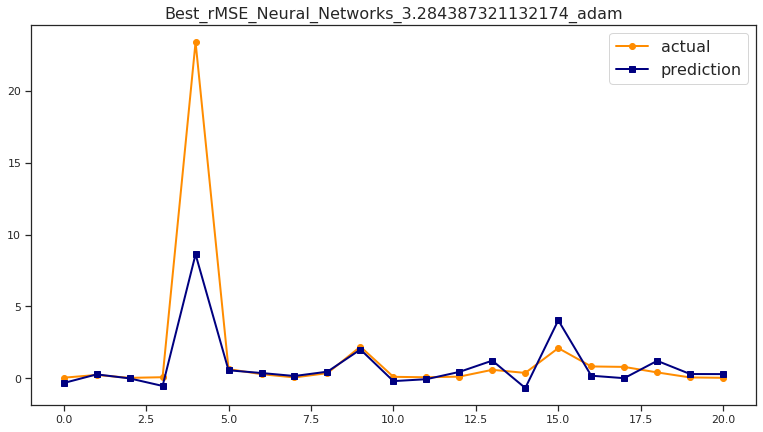

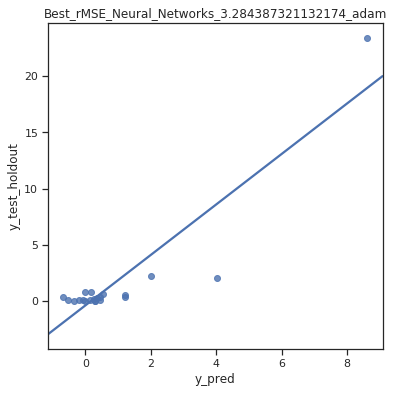

Predicted value when using best model R2 (NN with Solver is adam): 
[ 0.0592025   0.79344893  0.05591561  0.11987339 11.27935605  1.8577298
  0.1945495   0.39388129  0.53552853  1.90705769  0.02908321  0.54205449
  0.4266617   0.15132981  0.68060356  5.7135882   0.58617556  1.29164909
  0.98748172  0.0912822   0.13396053]
Actual value: 
[2.90140e-02 2.20648e-01 1.81330e-02 6.28870e-02 2.34100e+01 6.25696e-01
 2.74350e-01 4.75880e-02 3.48067e-01 2.19000e+00 9.03910e-02 5.92220e-02
 1.04190e-01 5.78119e-01 3.61564e-01 2.09000e+00 8.13417e-01 7.81000e-01
 3.96967e-01 4.68150e-02 2.19310e-02]


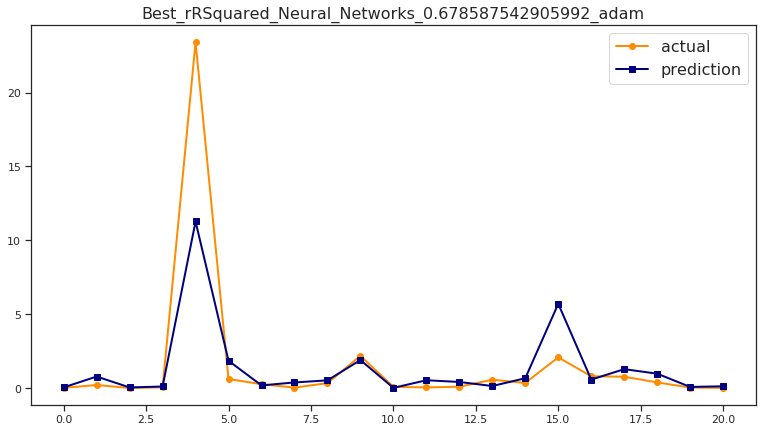

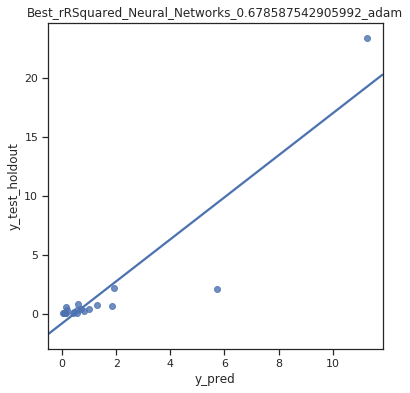

Predicted value when using best model MAE (NN with Solver is adam): 
[-1.46759422e-01  4.23612350e-01 -2.77026723e-01 -3.05498301e-01
  1.10052990e+01  1.09635254e+00 -7.98964844e-03 -3.60654058e-01
 -5.92758374e-03  2.35121079e+00 -1.50469293e-02 -6.11974402e-02
 -2.22134979e-01  5.68953349e-01  1.95918556e-03  3.26743706e+00
  5.20654599e-01  4.78504610e-01  1.53776024e+00 -5.37556196e-01
 -4.74736232e-01]
Actual value: 
[2.90140e-02 2.20648e-01 1.81330e-02 6.28870e-02 2.34100e+01 6.25696e-01
 2.74350e-01 4.75880e-02 3.48067e-01 2.19000e+00 9.03910e-02 5.92220e-02
 1.04190e-01 5.78119e-01 3.61564e-01 2.09000e+00 8.13417e-01 7.81000e-01
 3.96967e-01 4.68150e-02 2.19310e-02]


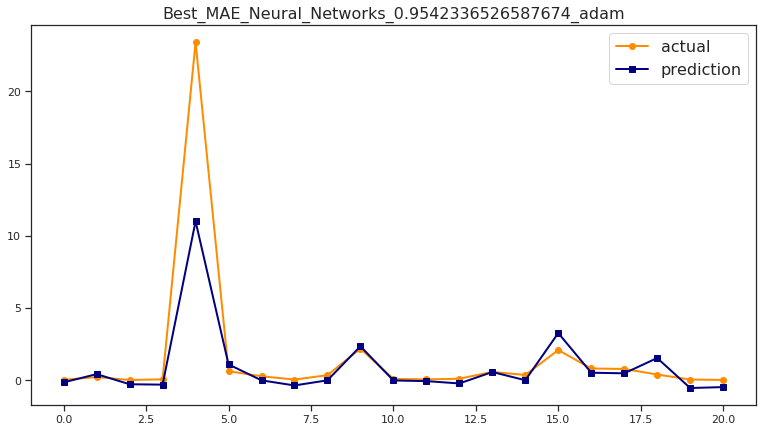

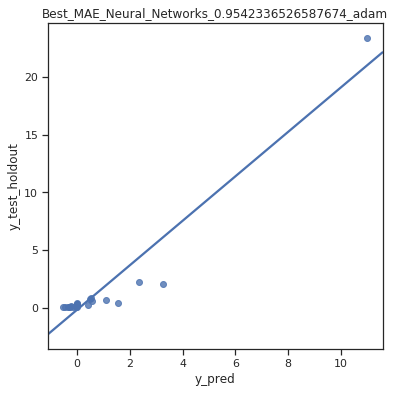

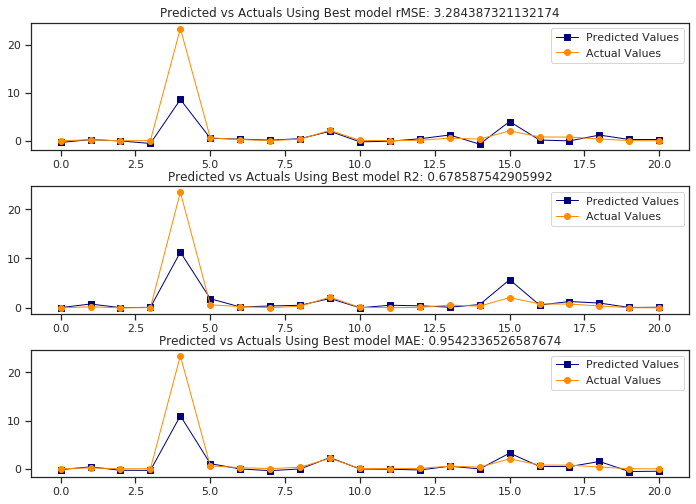

In [0]:
fileName = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + str(Solvers.adam.name) + ".sav"
bestNNModel_rMse = loadModel(fileName)
y_pred_holdout_rMSE_NN = None
y_pred_holdout_R2_NN = None
y_pred_holdout_MAE_NN = None

if(bestNNModel_rMse):
    y_pred_holdout_rMSE_NN = bestNNModel_rMse.predict(X_test_holdout)
    holdOutMeanSquaredError = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_rMSE_NN))
    heading = "Best_rMSE_Neural_Networks_" + str(holdOutMeanSquaredError) + "_adam"
    print("Predicted value when using best model rMSE (NN with Solver is adam): ")
    print(y_pred_holdout_rMSE_NN)   
    print("Actual value: ")
    print(y_test_holdout)
    line_plot(y_test_holdout, y_pred_holdout_rMSE_NN, title = heading)
    plotExpectedVsPredictedOutput2(y_test_holdout, y_pred_holdout_rMSE_NN, heading, saveToFile)
    #print("Weights: ")
    #print(bestNNModel_rMse.coefs_)

## LOAD MOEL ĐÃ TỐI ƯU R2
fileName = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.R_SQUARED.name) + str(Solvers.adam.name)+ ".sav"
bestNNModel_rSquared = loadModel(fileName)
if(bestNNModel_rSquared):
    y_pred_holdout_R2_NN = bestNNModel_rSquared.predict(X_test_holdout)
    holdOutValidationR2Squared = r2_score(y_test_holdout, y_pred_holdout_R2_NN)
    heading = "Best_rRSquared_Neural_Networks_" + str(holdOutValidationR2Squared) + "_adam"
    print("Predicted value when using best model R2 (NN with Solver is adam): ")
    print(y_pred_holdout_R2_NN)   
    print("Actual value: ")
    print(y_test_holdout)
    line_plot(y_test_holdout, y_pred_holdout_R2_NN, title = heading)
    plotExpectedVsPredictedOutput2(y_test_holdout, y_pred_holdout_R2_NN, heading, saveToFile)
    #print("Weights: ")
    #print(bestNNModel_rSquared.coefs_)

## LOAD MOEL ĐÃ TỐI ƯU MAE
fileName = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR.name) + str(Solvers.adam.name) +".sav"
bestNNModel_MAE = loadModel(fileName)
if(bestNNModel_MAE):
    y_pred_holdout_MAE_NN = bestNNModel_MAE.predict(X_test_holdout)
    holdOutMeanABError = mean_absolute_error(y_test_holdout, y_pred_holdout_MAE_NN)
    heading = "Best_MAE_Neural_Networks_" + str(holdOutMeanABError) + "_adam"
    print("Predicted value when using best model MAE (NN with Solver is adam): ")
    print(y_pred_holdout_MAE_NN)   
    print("Actual value: ")
    print(y_test_holdout)
    line_plot(y_test_holdout, y_pred_holdout_MAE_NN, title = heading)
    plotExpectedVsPredictedOutput2(y_test_holdout, y_pred_holdout_MAE_NN, heading, saveToFile)
    #print("Weights: ")
    #print(bestNNModel_MAE.coefs_)

plotResult(y_test_holdout, y_pred_holdout_rMSE_NN, y_pred_holdout_R2_NN, y_pred_holdout_MAE_NN, 
           rMSE = str(holdOutMeanSquaredError),R2 = str(holdOutValidationR2Squared), MAE = str(holdOutMeanABError))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Predicted value when using best model rMSE (NN with Solver is sgd): 
[-1.17442718e-02 -2.09867927e-01 -1.36953669e-01  4.12718620e-02
  2.21770243e+01  1.14039834e+00  3.08421495e-01 -6.67759482e-02
  1.89342611e-01  2.03775696e+00 -9.40095770e-03 -7.78418100e-02
  2.00608663e-01  5.30214996e-01  4.03418884e-01  2.15759735e+00
  4.46855120e-01  1.12860034e+00  1.39692500e+00  2.06263110e-01
  4.56435559e-01]
Actual value: 
[2.90140e-02 2.20648e-01 1.81330e-02 6.28870e-02 2.34100e+01 6.25696e-01
 2.74350e-01 4.75880e-02 3.48067e-01 2.19000e+00 9.03910e-02 5.92220e-02
 1.04190e-01 5.78119e-01 3.61564e-01 2.09000e+00 8.13417e-01 7.81000e-01
 3.96967e-01 4.68150e-02 2.19310e-02]


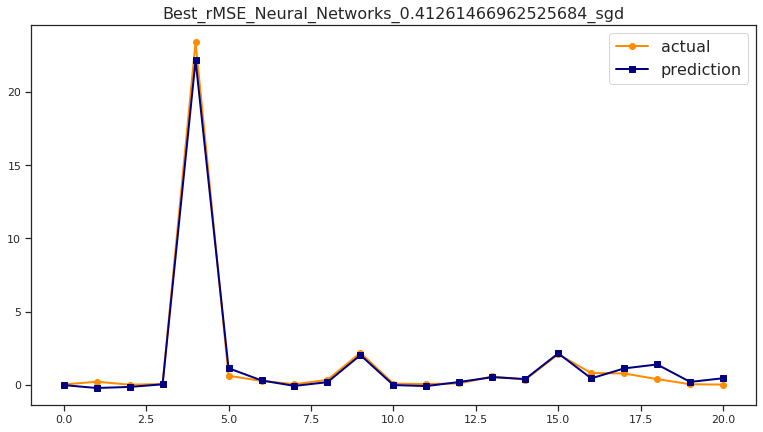

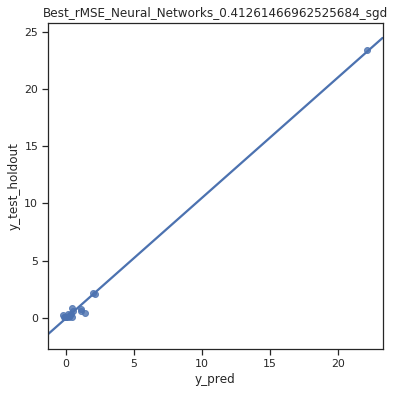

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Predicted value when using best model R2 (NN with Solver is sgd): 
[ 0.0340367   0.58979541  0.06853972  0.4802974  22.75659844  1.36278053
  0.43628355  0.02620328  0.57466157  1.01129943  0.08111116  0.06180429
 -0.0297748   0.59407005  0.20430179  2.17327177  0.24492838  1.01365334
  0.47691956 -0.14947228  0.33692838]
Actual value: 
[2.90140e-02 2.20648e-01 1.81330e-02 6.28870e-02 2.34100e+01 6.25696e-01
 2.74350e-01 4.75880e-02 3.48067e-01 2.19000e+00 9.03910e-02 5.92220e-02
 1.04190e-01 5.78119e-01 3.61564e-01 2.09000e+00 8.13417e-01 7.81000e-01
 3.96967e-01 4.68150e-02 2.19310e-02]


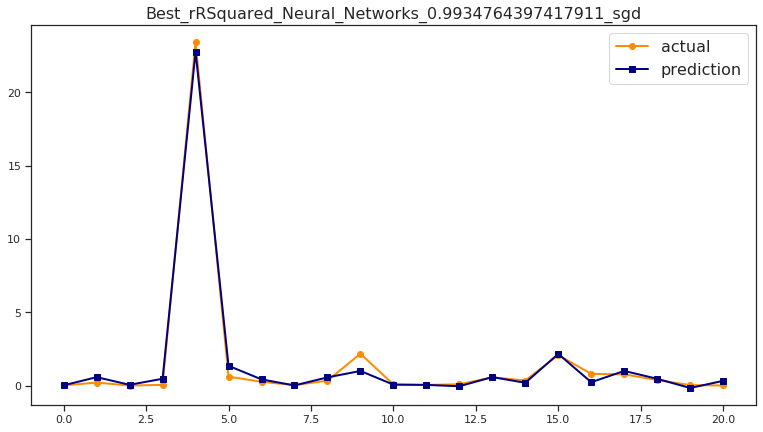

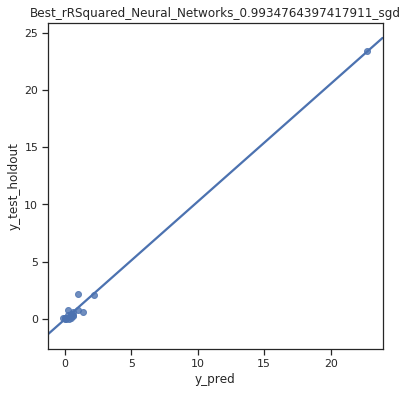

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.19.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Predicted value when using best model MAE (NN with Solver is sgd): 
[ 0.19311806  0.46556397  0.10854059  0.20806014 10.90099437  0.57891254
  0.54744024  0.01957167  0.27914754  2.13289294 -0.03110406  0.38268812
  0.1249833   0.6275595   0.27986148  1.75942276  0.36656716  1.04106745
  0.69734581 -0.17400691 -0.21659338]
Actual value: 
[2.90140e-02 2.20648e-01 1.81330e-02 6.28870e-02 2.34100e+01 6.25696e-01
 2.74350e-01 4.75880e-02 3.48067e-01 2.19000e+00 9.03910e-02 5.92220e-02
 1.04190e-01 5.78119e-01 3.61564e-01 2.09000e+00 8.13417e-01 7.81000e-01
 3.96967e-01 4.68150e-02 2.19310e-02]


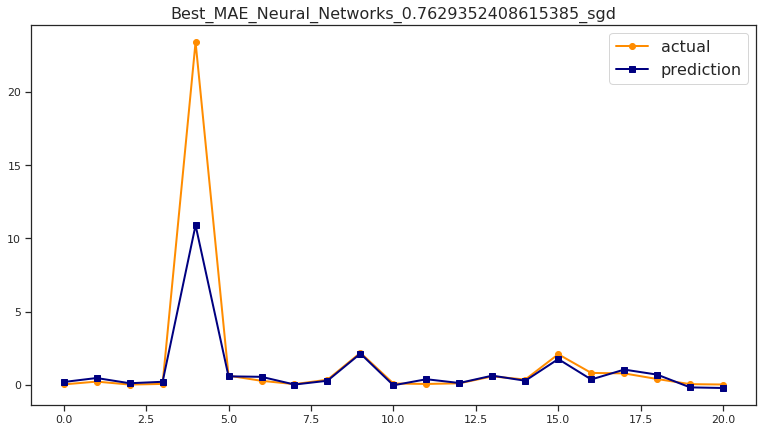

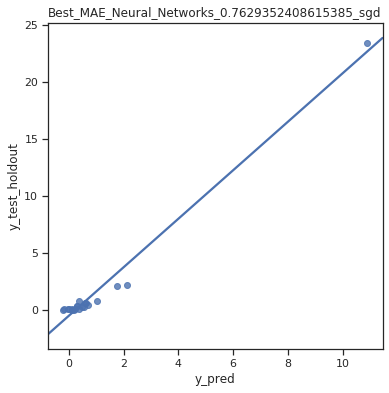

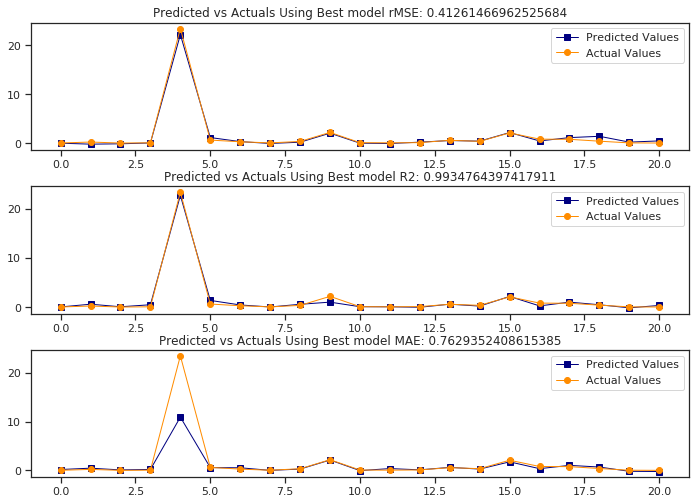

In [0]:
fileName = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + str(Solvers.sgd.name) + ".sav"
bestNNModel_rMse = loadModel(fileName)

if(bestNNModel_rMse):
    y_pred_holdout_rMSE_NN = bestNNModel_rMse.predict(X_test_holdout)
    holdOutMeanSquaredError = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_rMSE_NN))
    heading = "Best_rMSE_Neural_Networks_" + str(holdOutMeanSquaredError) + "_sgd"
    print("Predicted value when using best model rMSE (NN with Solver is sgd): ")
    print(y_pred_holdout_rMSE_NN)   
    print("Actual value: ")
    print(y_test_holdout)
    line_plot(y_test_holdout, y_pred_holdout_rMSE_NN, title = heading)
    plotExpectedVsPredictedOutput2(y_test_holdout, y_pred_holdout_rMSE_NN, heading, saveToFile)
    #print("Weights: ")
    #print(bestNNModel_rMse.coefs_)

## LOAD MOEL ĐÃ TỐI ƯU R2
fileName = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.R_SQUARED.name) + str(Solvers.sgd.name)+ ".sav"
bestNNModel_rSquared = loadModel(fileName)
if(bestNNModel_rSquared):
    y_pred_holdout_R2_NN = bestNNModel_rSquared.predict(X_test_holdout)
    holdOutValidationR2Squared = r2_score(y_test_holdout, y_pred_holdout_R2_NN)
    heading = "Best_rRSquared_Neural_Networks_" + str(holdOutValidationR2Squared) + "_sgd"
    print("Predicted value when using best model R2 (NN with Solver is sgd): ")
    print(y_pred_holdout_R2_NN)   
    print("Actual value: ")
    print(y_test_holdout)
    line_plot(y_test_holdout, y_pred_holdout_R2_NN, title = heading)
    plotExpectedVsPredictedOutput2(y_test_holdout, y_pred_holdout_R2_NN, heading, saveToFile)
    #print("Weights: ")
    #print(bestNNModel_rSquared.coefs_)

## LOAD MOEL ĐÃ TỐI ƯU MAE
fileName = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR.name) + str(Solvers.sgd.name) +".sav"
bestNNModel_MAE = loadModel(fileName)
if(bestNNModel_MAE):
    y_pred_holdout_MAE_NN = bestNNModel_MAE.predict(X_test_holdout)
    holdOutMeanABError = mean_absolute_error(y_test_holdout, y_pred_holdout_MAE_NN)
    heading = "Best_MAE_Neural_Networks_" + str(holdOutMeanABError) + "_sgd"
    print("Predicted value when using best model MAE (NN with Solver is sgd): ")
    print(y_pred_holdout_MAE_NN)   
    print("Actual value: ")
    print(y_test_holdout)
    line_plot(y_test_holdout, y_pred_holdout_MAE_NN, title = heading)
    plotExpectedVsPredictedOutput2(y_test_holdout, y_pred_holdout_MAE_NN, heading, saveToFile)
    #print("Weights: ")
    #print(bestNNModel_MAE.coefs_)

plotResult(y_test_holdout, y_pred_holdout_rMSE_NN, y_pred_holdout_R2_NN, y_pred_holdout_MAE_NN, 
           rMSE = str(holdOutMeanSquaredError),R2 = str(holdOutValidationR2Squared), MAE = str(holdOutMeanABError))

## SỬ DỤNG MODEL ĐỂ DỰ ĐOÁN GIÁ SAU 6 THÁNG

Price of 3 ICO using best model rMSE
Predicted value of ICO 0x (real price: 1.08) after 6 months using best model rMSE:  [3.16080389]
Predicted value of ICO modum (real price: 2.79) after 6 months using best model rMSE:  [1.79276381]
Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model rMSE:  [-0.00416814]
Value rMSE, R2, MAE of best model rMSE
Value rMSE:  3.284387321132174
Value R2:  0.5551592509621766
Value MAE:  1.120382457396877


*************************************************************************************
Price of 3 ICO using best model R2
Predicted value of ICO 0x (real price: 1.08) after 6 months using best model R2:  [1.24013324]
Predicted value of ICO modum (real price: 2.79) after 6 months using best model R2:  [5.30623251]
Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model R2:  [1.29164909]
Value rMSE, R2, MAE of best model R2
Value rMSE:  2.791794437975647
Value R2:  0.678587542905992
Value MAE:  1.

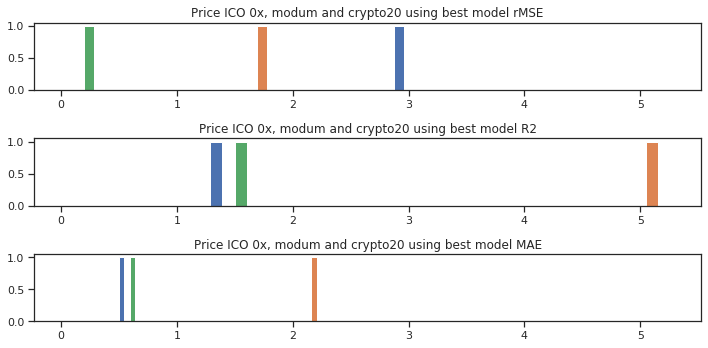

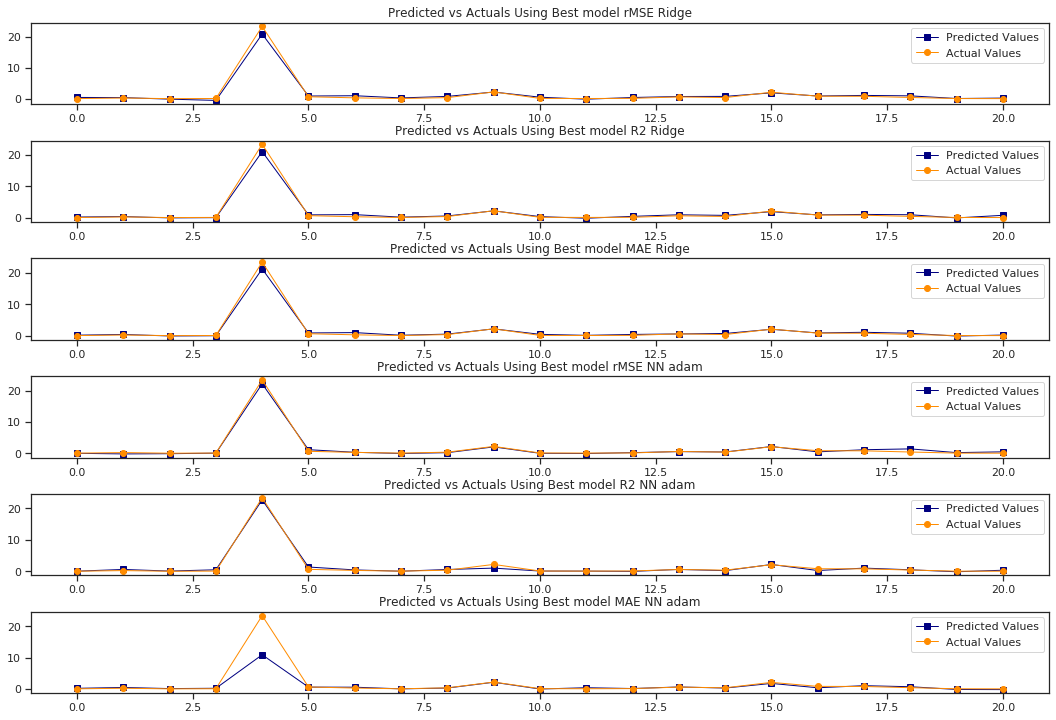

In [0]:
# Load model with best rMse and make prediction
plotNNrMSE = []
plotNNR2 = []
plotNNMAE = []
fileName = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + str(Solvers.adam.name) + ".sav"
bestNN = joblib.load(fileName)

fileName1 = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.R_SQUARED.name) + str(Solvers.adam.name)+ ".sav"
bestNNModel_rS = joblib.load(fileName1)

fileName2 = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR.name) + str(Solvers.adam.name) +".sav"
bestNNModel_MAE = joblib.load(fileName2)

y_pred =  makePrediction(bestNN, ico_0x)
y_pred1 = makePrediction(bestNN, ico_modum)
y_pred2 = makePrediction(bestNN, ico_crypto20)
plotNNrMSE.append(y_pred)
plotNNrMSE.append(y_pred1)
plotNNrMSE.append(y_pred2)
y_pred_holdout = bestNN.predict(X_test_holdout)
R2coefficientHoldout = r2_score(y_test_holdout, y_pred_holdout)
rMeanSquaredErrorHoldout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
meanAbsoluteErrorHoldout= mean_absolute_error(y_test_holdout, y_pred_holdout)
print("Price of 3 ICO using best model rMSE")
print("Predicted value of ICO 0x (real price: 1.08) after 6 months using best model rMSE: ",y_pred)
print("Predicted value of ICO modum (real price: 2.79) after 6 months using best model rMSE: ",y_pred1)
print("Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model rMSE: ",y_pred2)
print("Value rMSE, R2, MAE of best model rMSE")
print("Value rMSE: ", rMeanSquaredErrorHoldout)
print("Value R2: ", R2coefficientHoldout)
print("Value MAE: ", meanAbsoluteErrorHoldout) 
print("\n")       
print("*************************************************************************************")

y_pred3 = makePrediction(bestNNModel_rS, ico_0x)
y_pred4 = makePrediction(bestNNModel_rS, ico_modum)
y_pred5 = makePrediction(bestNNModel_rS, ico_crypto20)
plotNNR2.append(y_pred3)
plotNNR2.append(y_pred4)
plotNNR2.append(y_pred5)
y_pred_holdout = bestNNModel_rS.predict(X_test_holdout)
R2coefficientHoldout = r2_score(y_test_holdout, y_pred_holdout)
rMeanSquaredErrorHoldout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
meanAbsoluteErrorHoldout= mean_absolute_error(y_test_holdout, y_pred_holdout)
print("Price of 3 ICO using best model R2")
print("Predicted value of ICO 0x (real price: 1.08) after 6 months using best model R2: ",y_pred3)
print("Predicted value of ICO modum (real price: 2.79) after 6 months using best model R2: ",y_pred4)
print("Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model R2: ",y_pred5)
print("Value rMSE, R2, MAE of best model R2")
print("Value rMSE: ", rMeanSquaredErrorHoldout)
print("Value R2: ", R2coefficientHoldout)
print("Value MAE: ", meanAbsoluteErrorHoldout) 
print("\n")       
print("*************************************************************************************")

y_pred3 = makePrediction(bestNNModel_MAE, ico_0x)
y_pred4 = makePrediction(bestNNModel_MAE, ico_modum)
y_pred5 = makePrediction(bestNNModel_MAE, ico_crypto20)
plotNNMAE.append(y_pred3)
plotNNMAE.append(y_pred4)
plotNNMAE.append(y_pred5)
y_pred_holdout = bestNNModel_MAE.predict(X_test_holdout)
R2coefficientHoldout = r2_score(y_test_holdout, y_pred_holdout)
rMeanSquaredErrorHoldout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
meanAbsoluteErrorHoldout= mean_absolute_error(y_test_holdout, y_pred_holdout)
print("Price of 3 ICO using best model MAE")
print("Predicted value of ICO 0x (real price: 1.08) after 6 months using best model MAE: ",y_pred3)
print("Predicted value of ICO modum (real price: 2.79) after 6 months using best model MAE: ",y_pred4)
print("Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model MAE: ",y_pred5)
print("Value rMSE, R2, MAE of best model MAE")
print("Value rMSE: ", rMeanSquaredErrorHoldout)
print("Value R2: ", R2coefficientHoldout)
print("Value MAE: ", meanAbsoluteErrorHoldout)  
print("\n")       
print("*************************************************************************************")
plotPredicted(plotNNrMSE, plotNNR2, plotNNMAE)
plotResult2(y_test_holdout, y_pred_holdout_rMSE, y_pred_holdout_R2, y_pred_holdout_MAE, y_pred_holdout_rMSE_NN, 
                y_pred_holdout_R2_NN, y_pred_holdout_MAE_NN, solver = Solvers.adam)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.19.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Price of 3 ICO using best model rMSE
Predicted value of ICO 0x (real price: 1.08) after 6 months using best model rMSE:  [1.40170709]
Predicted value of ICO modum (real price: 2.79) after 6 months using best model rMSE:  [2.7438834]
Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model rMSE:  [1.12860034]
Value rMSE, R2, MAE of best model rMSE
Value rMSE:  0.41261466962525684
Value R2:  0.9929792233345709
Value MAE:  0.26922668777334813


*************************************************************************************
Price of 3 ICO using best model R2
Predicted value of ICO 0x (real price: 1.08) after 6 months using best model R2:  [1.21950259]
Predicted value of ICO modum (real price: 2.79) after 6 months using best model R2:  [2.78112754]
Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model R2:  [1.01365334]
Value rMSE, R2, MAE of best model R2
Value rMSE:  0.3977355628422759
Value R2:  0.9934764397417911
Value MAE:

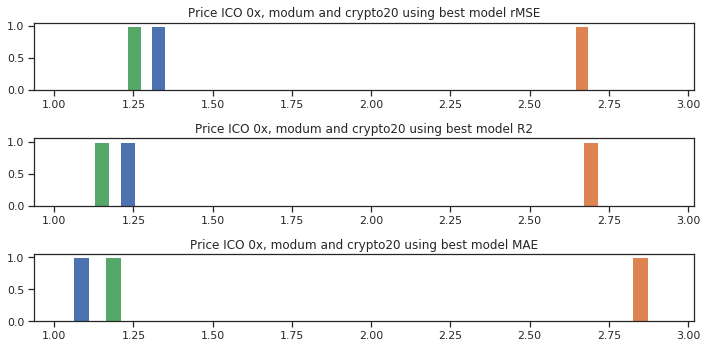

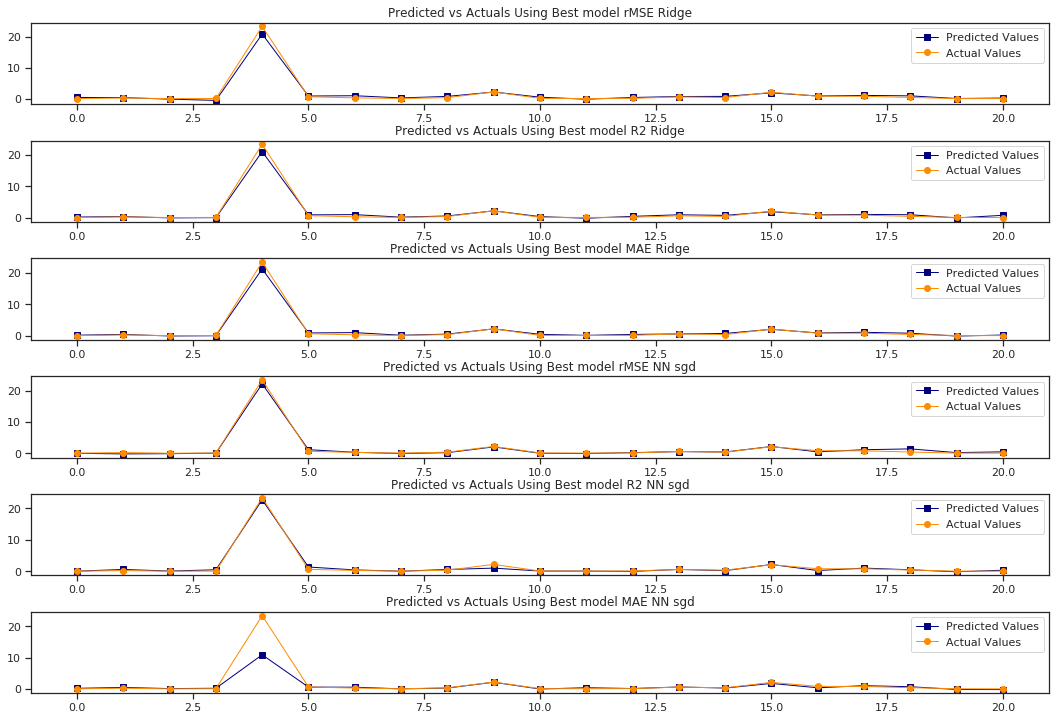

In [0]:
# Load model with best rMse and make prediction
plotNNrMSE = []
plotNNR2 = []
plotNNMAE = []
fileName = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + str(Solvers.sgd.name) + ".sav"
bestNN = joblib.load(fileName)

fileName1 = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.R_SQUARED.name) + str(Solvers.sgd.name)+ ".sav"
bestNNModel_rS = joblib.load(fileName1)

fileName2 = "RESULT/" + "bestNNModel_" + str(LineaReggressionMetrics.MEAN_ABSOLUTE_ERROR.name) + str(Solvers.sgd.name) +".sav"
bestNNModel_MAE = joblib.load(fileName2)

y_pred =  makePrediction(bestNN, ico_0x)
y_pred1 = makePrediction(bestNN, ico_modum)
y_pred2 = makePrediction(bestNN, ico_crypto20)
plotNNrMSE.append(y_pred)
plotNNrMSE.append(y_pred1)
plotNNrMSE.append(y_pred2)
y_pred_holdout = bestNN.predict(X_test_holdout)
R2coefficientHoldout = r2_score(y_test_holdout, y_pred_holdout)
rMeanSquaredErrorHoldout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
meanAbsoluteErrorHoldout= mean_absolute_error(y_test_holdout, y_pred_holdout)
print("Price of 3 ICO using best model rMSE")
print("Predicted value of ICO 0x (real price: 1.08) after 6 months using best model rMSE: ",y_pred)
print("Predicted value of ICO modum (real price: 2.79) after 6 months using best model rMSE: ",y_pred1)
print("Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model rMSE: ",y_pred2)
print("Value rMSE, R2, MAE of best model rMSE")
print("Value rMSE: ", rMeanSquaredErrorHoldout)
print("Value R2: ", R2coefficientHoldout)
print("Value MAE: ", meanAbsoluteErrorHoldout) 
print("\n")       
print("*************************************************************************************")

y_pred3 = makePrediction(bestNNModel_rS, ico_0x)
y_pred4 = makePrediction(bestNNModel_rS, ico_modum)
y_pred5 = makePrediction(bestNNModel_rS, ico_crypto20)
plotNNR2.append(y_pred3)
plotNNR2.append(y_pred4)
plotNNR2.append(y_pred5)
y_pred_holdout = bestNNModel_rS.predict(X_test_holdout)
R2coefficientHoldout = r2_score(y_test_holdout, y_pred_holdout)
rMeanSquaredErrorHoldout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
meanAbsoluteErrorHoldout= mean_absolute_error(y_test_holdout, y_pred_holdout)
print("Price of 3 ICO using best model R2")
print("Predicted value of ICO 0x (real price: 1.08) after 6 months using best model R2: ",y_pred3)
print("Predicted value of ICO modum (real price: 2.79) after 6 months using best model R2: ",y_pred4)
print("Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model R2: ",y_pred5)
print("Value rMSE, R2, MAE of best model R2")
print("Value rMSE: ", rMeanSquaredErrorHoldout)
print("Value R2: ", R2coefficientHoldout)
print("Value MAE: ", meanAbsoluteErrorHoldout) 
print("\n")       
print("*************************************************************************************")

y_pred3 = makePrediction(bestNNModel_MAE, ico_0x)
y_pred4 = makePrediction(bestNNModel_MAE, ico_modum)
y_pred5 = makePrediction(bestNNModel_MAE, ico_crypto20)
plotNNMAE.append(y_pred3)
plotNNMAE.append(y_pred4)
plotNNMAE.append(y_pred5)
y_pred_holdout = bestNNModel_MAE.predict(X_test_holdout)
R2coefficientHoldout = r2_score(y_test_holdout, y_pred_holdout)
rMeanSquaredErrorHoldout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
meanAbsoluteErrorHoldout= mean_absolute_error(y_test_holdout, y_pred_holdout)
print("Price of 3 ICO using best model MAE")
print("Predicted value of ICO 0x (real price: 1.08) after 6 months using best model MAE: ",y_pred3)
print("Predicted value of ICO modum (real price: 2.79) after 6 months using best model MAE: ",y_pred4)
print("Predicted value of ICO crypto20 (real price: 0.9786) after 6 months using best model MAE: ",y_pred5)
print("Value rMSE, R2, MAE of best model MAE")
print("Value rMSE: ", rMeanSquaredErrorHoldout)
print("Value R2: ", R2coefficientHoldout)
print("Value MAE: ", meanAbsoluteErrorHoldout)  
print("\n")       
print("*************************************************************************************")
plotPredicted(plotNNrMSE, plotNNR2, plotNNMAE)
plotResult2(y_test_holdout, y_pred_holdout_rMSE, y_pred_holdout_R2, y_pred_holdout_MAE, y_pred_holdout_rMSE_NN, 
                y_pred_holdout_R2_NN, y_pred_holdout_MAE_NN, solver = Solvers.sgd)

In [0]:
from google.colab import files
!zip -r /content/IMAGE_LINE_PLOT.zip /content/IMAGE_LINE_PLOT/
files.download("/content/IMAGE_LINE_PLOT.zip")

  adding: content/IMAGE_LINE_PLOT/ (stored 0%)
  adding: content/IMAGE_LINE_PLOT/Training Error: 0.004420865767021896.png (deflated 21%)
  adding: content/IMAGE_LINE_PLOT/Best_MAE_Neural_Networks_0.7629352408615385_sgd.png (deflated 27%)
  adding: content/IMAGE_LINE_PLOT/Best_rMSE_Ridge_Regression_0.6275776071508183.png (deflated 28%)
  adding: content/IMAGE_LINE_PLOT/Best_rMSE_Neural_Networks_3.284387321132174_adam.png (deflated 27%)
  adding: content/IMAGE_LINE_PLOT/Best_MAE_Neural_Networks_0.9542336526587674_adam.png (deflated 26%)
  adding: content/IMAGE_LINE_PLOT/Best_rMSE_Neural_Networks_0.41261466962525684_sgd.png (deflated 28%)
  adding: content/IMAGE_LINE_PLOT/Best_MAE_Ridge_Regression_0.2884924912445836.png (deflated 28%)
  adding: content/IMAGE_LINE_PLOT/Best_rRSquared_Neural_Networks_0.678587542905992_adam.png (deflated 26%)
  adding: content/IMAGE_LINE_PLOT/Test Error: 6.153324460606862.png (deflated 24%)
  adding: content/IMAGE_LINE_PLOT/.zip (stored 0%)
  adding: content